## Housing property price prediction

We wil use the dataset to predict the actual price of the housing properties. To do that, we will be following the steps as below:

- Data understanding - size, attributes
- Data cleaning if required
- Visualising the features against the target variable
- Data transformation and creating dummies for categorical variables
- Obtaining correlations among independent numeric features.
- Building simple linear regression model
- Building regularised linear regression model using Ridge and Lasso regression
- Inference and comparing the metrics

In [7347]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, scale
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [7348]:
housing_data = pd.read_csv('train.csv')

In [7349]:
# Checking the null and not-null values in each columns

print (housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7350]:
# Checking the dataframe shape

print (housing_data.shape)

(1460, 81)


In [7351]:
# Inspecting first few rows

housing_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7352]:
# Dropping duplicate rows

housing_data = housing_data.drop_duplicates()

In [7353]:
# Drop rows containing all NA values

housing_data = housing_data.dropna(how='all')

In [7354]:
# Check if any rows are dropped post drop operation

print (housing_data.shape)

(1460, 81)


In [7355]:
# Percentage of missing values in each field

total_rows = housing_data.shape[0]
series = housing_data.isnull().sum().sort_values(ascending=False)/total_rows * 100
print (series.head(20))

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64


### Segregating features based on different categories

### Target Variable : `SalePrice`

We will be visualising the target variable against each and every independent features based on different categories and drop them, create dummies or derive other features wherever required.


In [7356]:
# Initilizing categorical_vars to store list of all the categorical features. 
# Initilizing numerical_vars to store list of all numeric features.
# We will keep on appending to this list as and when we analyse each variable

categorical_vars = []
numerical_vars = ['SalePrice']

In [7357]:
# Inspecting SalePrice column with percentile values = 0.32, 0.64, 0.97

housing_data['SalePrice'].describe(percentiles=[0.32, 0.64, 0.97])

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
32%      138000.000000
50%      163000.000000
64%      185690.000000
97%      374230.000000
max      755000.000000
Name: SalePrice, dtype: float64

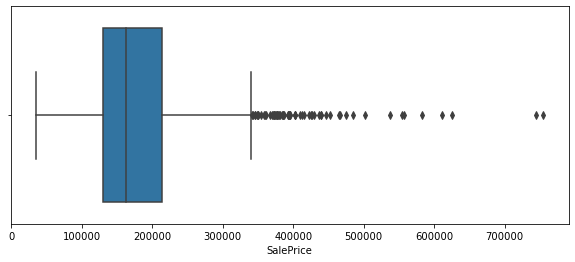

In [7358]:
# Visualizing SalePrice using boxplot

plt.figure(figsize=(10,4))
sns.boxplot(housing_data['SalePrice'])
plt.show()

In [7359]:
# Considering removal of outliers beyond 99% of values

# Checking the number of rows to remove
housing_data[ housing_data['SalePrice'] > 425000].shape[0]

20

In [7360]:
# Ignoring properties with SalePrice > 4,25,000

housing_data = housing_data[ housing_data['SalePrice'] <= 425000]
housing_data.shape

(1440, 81)

In [7361]:
# Ploting boxplot to check for range of values after ignoring the outliers

plt.figure(figsize=(10,4))
sns.boxplot(housing_data['SalePrice'])
plt.show()

In [7362]:
# Checking for skewness in the data an displaying the columns which have more than 90% of skewness

total_rows = housing_data.shape[0]
for col in housing_data.columns:
    percentage_of_skewness = np.max(housing_data[col].value_counts())/total_rows * 100
    if percentage_of_skewness > 90:
        print ("Col name = ", col, " :: Skewness = ", percentage_of_skewness)

Col name =  Street  :: Skewness =  99.58333333333333
Col name =  Utilities  :: Skewness =  99.93055555555556
Col name =  LandSlope  :: Skewness =  94.65277777777777
Col name =  Condition2  :: Skewness =  98.95833333333334
Col name =  RoofMatl  :: Skewness =  98.33333333333333
Col name =  Heating  :: Skewness =  97.77777777777777
Col name =  CentralAir  :: Skewness =  93.40277777777779
Col name =  Electrical  :: Skewness =  91.25
Col name =  LowQualFinSF  :: Skewness =  98.26388888888889
Col name =  BsmtHalfBath  :: Skewness =  94.375
Col name =  KitchenAbvGr  :: Skewness =  95.27777777777777
Col name =  Functional  :: Skewness =  93.125
Col name =  GarageCond  :: Skewness =  90.69444444444444
Col name =  PavedDrive  :: Skewness =  91.66666666666666
Col name =  3SsnPorch  :: Skewness =  98.33333333333333
Col name =  ScreenPorch  :: Skewness =  92.22222222222223
Col name =  PoolArea  :: Skewness =  99.58333333333333
Col name =  MiscVal  :: Skewness =  96.38888888888889


**For all the above colunms, we won't drop it at a go. We will analyse each variable individually and then drop them as per our needs.**

### Location/Zone 
In which type of locality is the property situated and what are the nearby places -> `MSZoning`, `Neighbourhood`, `Condition1`, `Condition2`

**Categorical variables** : `MSZoning`, `Neighborhood`, `Condition1`, `Condition2`

In [7363]:
# Checking count of each category in MSZoning

housing_data['MSZoning'].astype('category').value_counts()

RL         1132
RM          217
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

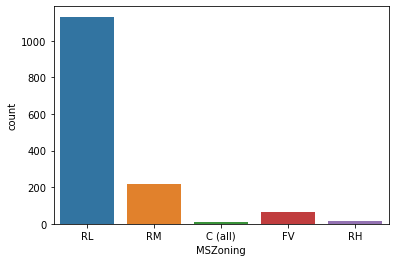

In [7364]:
# Visualizing MSZoning using countplot

sns.countplot(housing_data['MSZoning'])
plt.show()

In [7365]:
# Checking count of each category in Neighborhood

housing_data['Neighborhood'].astype('category').value_counts()

NAmes      225
CollgCr    150
OldTown    112
Edwards    100
Somerst     86
Gilbert     79
Sawyer      74
NWAmes      73
NridgHt     67
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
Timber      38
IDOTRR      37
NoRidge     36
ClearCr     28
SWISU       25
StoneBr     21
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

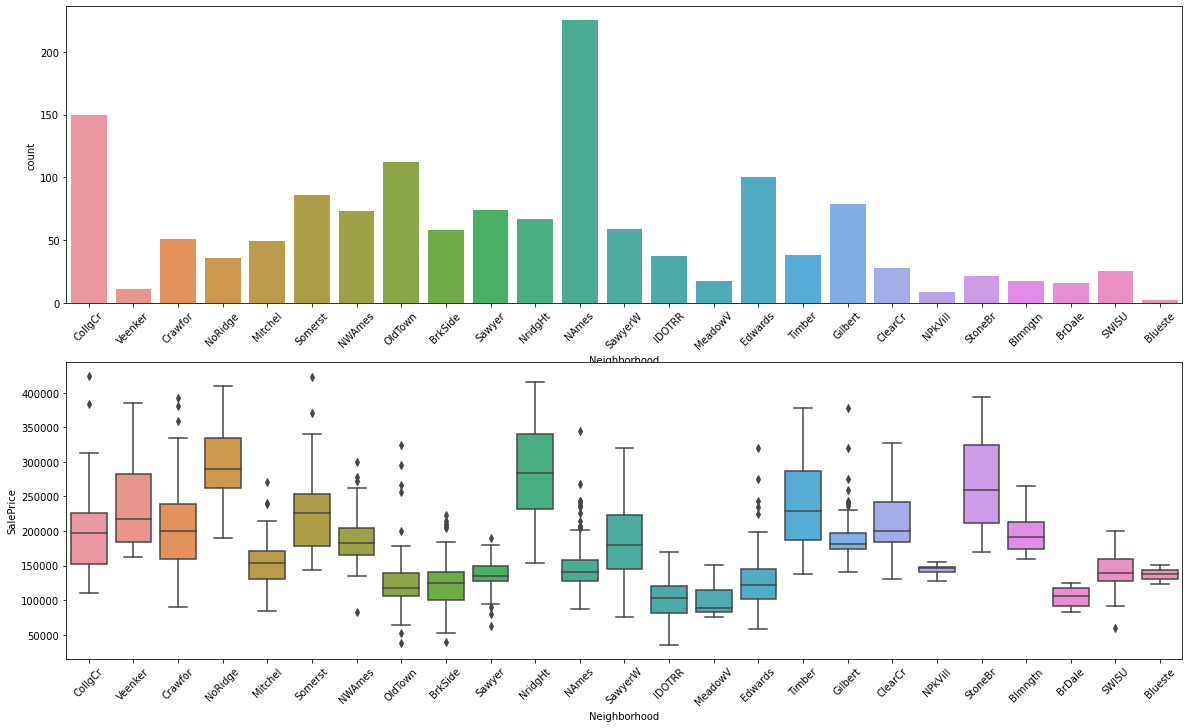

In [7366]:
# Visualizing Neighborhood

plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.xticks(rotation=45)
sns.countplot(housing_data['Neighborhood'])

# SalePrice for various properties in each Neighborhood

plt.subplot(2, 1, 2)
plt.xticks(rotation=45)
sns.boxplot(data=housing_data, x='Neighborhood', y='SalePrice')
plt.show()

Maximum properties were sold in **North Ames** neighborhood city whereas only 2 properties were sold in **Bluestem**. 

In [7367]:
# Proximity areas of the property

housing_data['Condition1'].astype('category').value_counts()

Norm      1241
Feedr       81
Artery      47
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

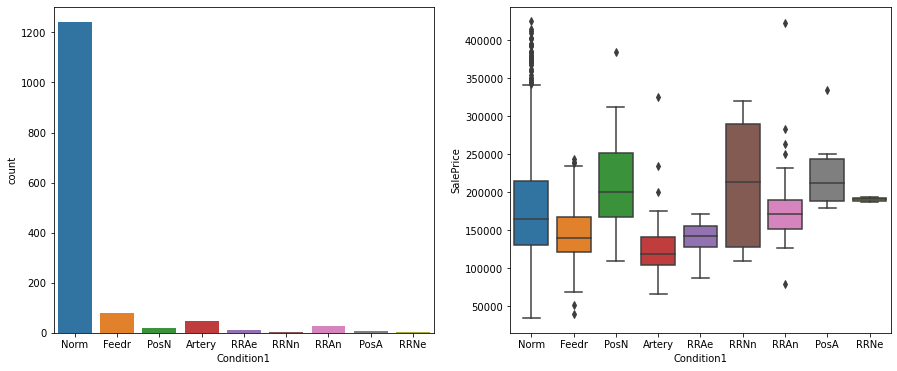

In [7368]:
# Visualising count for Condition1

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['Condition1'])

# SalePrice of properties which each condition1 locations
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='Condition1', y='SalePrice')

plt.show()

Maximum properties are located in **Normal** areas

In [7369]:
# Another proximity area for the property

housing_data['Condition2'].astype('category').value_counts()

Norm      1425
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

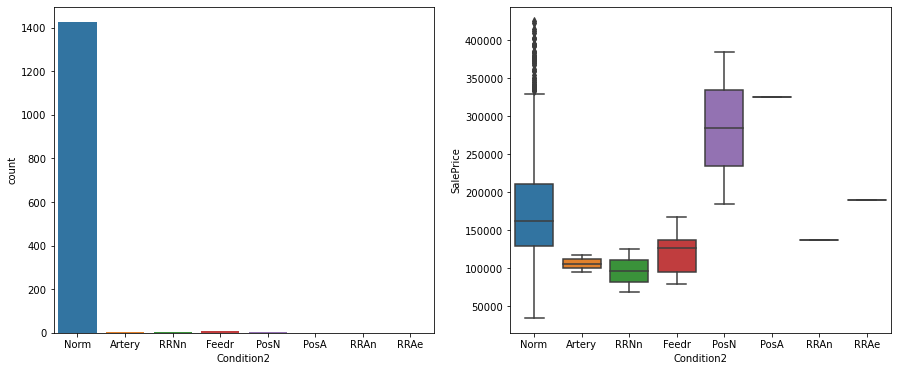

In [7370]:
# Visualising count for Condition2

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['Condition2'])

# SalePrice of properties which each Condition2 locations
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='Condition2', y='SalePrice')

plt.show()

There is a huge class imbalance in Condition1 and Condition2 features. We won't use these features as the data might not be useful.

In [7371]:
zone_categorical_vars = ['MSZoning', 'Neighborhood']

In [7372]:
categorical_vars.extend(zone_categorical_vars)
print (categorical_vars)

['MSZoning', 'Neighborhood']


### Geographical attributes 
Shape and level of land near the property -> `LandContour`, `LandSlope`

**Ordinal Categorical variables** : `LandContour`, `LandSlope`

In [7373]:
housing_data['LandContour'].astype('category').value_counts()

Lvl    1293
Bnk      63
HLS      48
Low      36
Name: LandContour, dtype: int64

In [7374]:
# Visualising count for LandContour

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['LandContour'])

# SalePrice of properties located in different types of land contours
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='LandContour', y='SalePrice')

plt.show()

We can map LandContour to either 'Level' or 'Unlevel' to avoid class imbalance

In [7375]:
housing_data['LandContour'] = housing_data['LandContour'].apply(lambda x: 'Lvl' if x=='Lvl' else 'Unlevel')

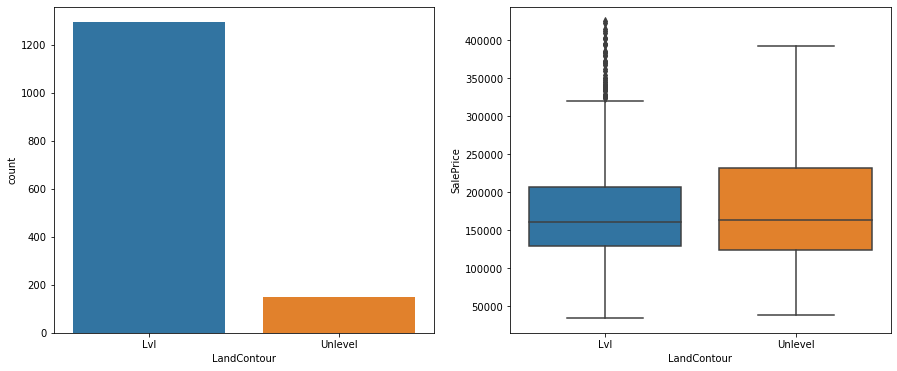

In [7376]:
# Visualising count for LandContour

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['LandContour'])

# SalePrice of properties located in different types of land contours
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='LandContour', y='SalePrice')

plt.show()

In [7377]:
housing_data['LandSlope'].astype('category').value_counts()

Gtl    1363
Mod      64
Sev      13
Name: LandSlope, dtype: int64

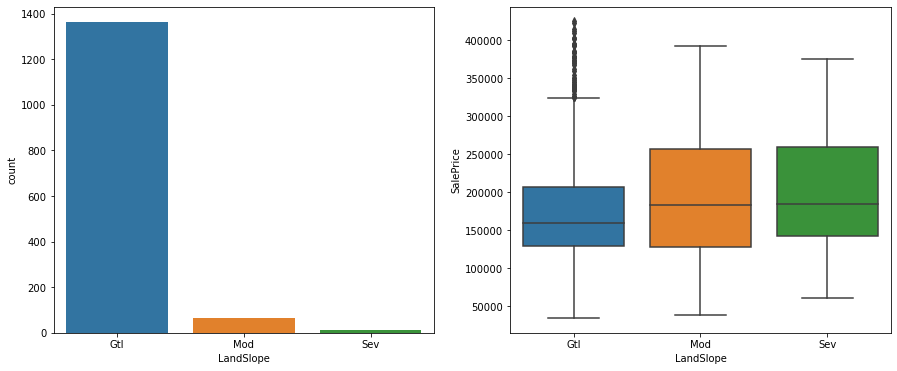

In [7378]:
# Visualising count for LandSlope

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['LandSlope'])

# SalePrice of properties located in different land slopes
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='LandSlope', y='SalePrice')

plt.show()

Since we have 78 properties only in slopy areas, we won't use this for analysis.

In [7379]:
geo_categorical_vars = ['LandContour']

In [7380]:
categorical_vars.extend(geo_categorical_vars)
print (categorical_vars)

['MSZoning', 'Neighborhood', 'LandContour']


### Exteriors - way to property
The features related to exterior surroundings which leads to the property -> `LotFrontage` , `LotArea` , `Street` , `Alley` , `LotShape` , `LotConfig` 

**Ordinal features** : `Street` , `Alley` , `LotShape` , `PavedDrive`

**Categorical variables** : `LotConfig`

**Numerical variables** : `LotFrontage` , `LotArea`

We will be converting ordinal features to numerical attributes and categorise accordingly

In [7381]:
# Inspecting count of properties in each Street types

housing_data['Street'].astype('category').value_counts()

Pave    1434
Grvl       6
Name: Street, dtype: int64

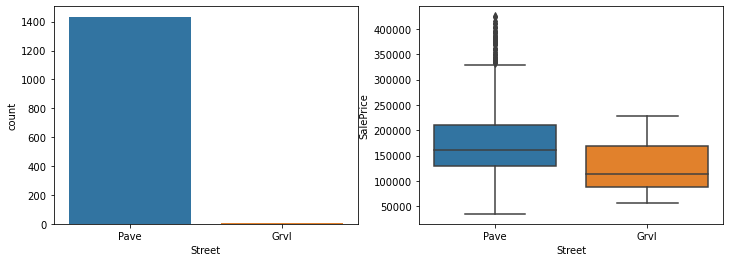

In [7382]:
# Visualising count for Street

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['Street'])

# SalePrice of properties located in paved and gravel street
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='Street', y='SalePrice')

plt.show()

This feature won't add any value to our analysis as most of the properties are in paved street.

In [7383]:
# Inspecting types of alleys

housing_data['Alley'].astype('category').value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

Only 91 properties have alley access. We can update the rest to `No Alley` so that it can be categorised as No Alley access

In [7384]:
housing_data['Alley'].fillna(value='No Alley', inplace=True)
housing_data['Alley'].astype('category').value_counts()

No Alley    1349
Grvl          50
Pave          41
Name: Alley, dtype: int64

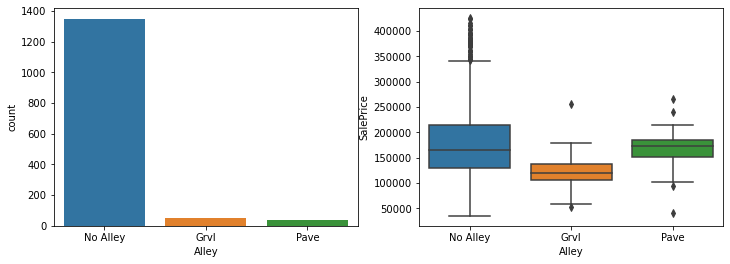

In [7385]:
# Visualising count for Alley types

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['Alley'])

# SalePrice of properties which different types of alley access
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='Alley', y='SalePrice')

plt.show()

We won't use this feature as well due to maximum properties having no alley access

In [7386]:
# Inspecting shape of property

housing_data['LotShape'].astype('category').value_counts()

Reg    919
IR1    474
IR2     37
IR3     10
Name: LotShape, dtype: int64

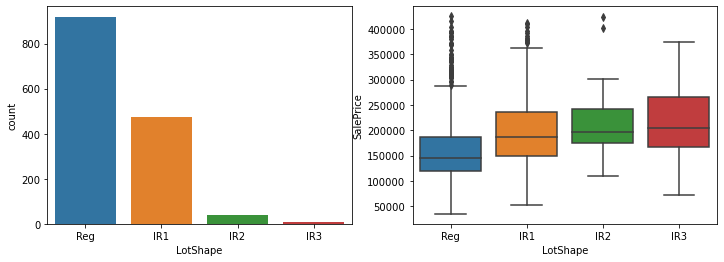

In [7387]:
# Visualising count for LotShape types

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['LotShape'])

# SalePrice of properties which different lot shapes
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='LotShape', y='SalePrice')

plt.show()

We will map all types of irregular plots to 1 common category

In [7388]:
housing_data['LotShape'] = housing_data['LotShape'].apply(lambda x: 'Reg' if x=='Reg' else 'Irreg')

In [7389]:
# Visualising count for LotShape types after mapping irregular plot types

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['LotShape'])

# SalePrice of properties which different lot shapes
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='LotShape', y='SalePrice')

plt.show()

In [7390]:
# Inspecting LotConfig

housing_data['LotConfig'].astype('category').value_counts()

Inside     1039
Corner      260
CulDSac      90
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [7391]:
# Visualising count for LotConfig

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['LotConfig'])

# SalePrice of properties which different LotConfig
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='LotConfig', y='SalePrice')

plt.show()

In [7392]:
# Inspecting PavedDrive

housing_data['PavedDrive'].astype('category').value_counts()

Y    1320
N      90
P      30
Name: PavedDrive, dtype: int64

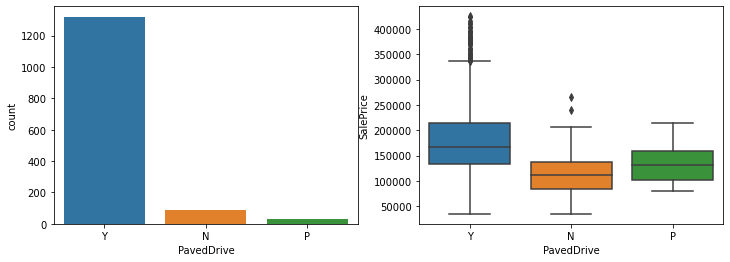

In [7393]:
# Visualising count for PavedDrive

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['PavedDrive'])

# SalePrice of properties which different PavedDrive
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='PavedDrive', y='SalePrice')

plt.show()

We won't use this feature to avoid data biasing

In [7394]:
housing_data['LotFrontage'].describe()

count    1183.000000
mean       69.693998
std        24.083597
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

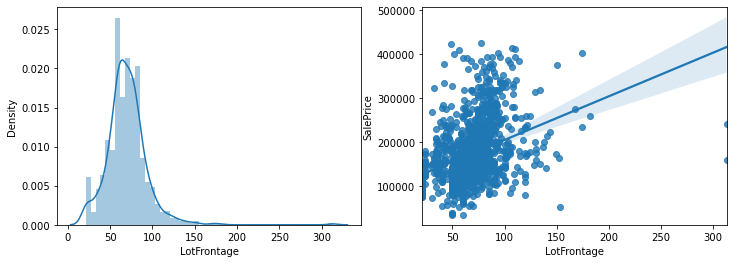

In [7395]:
# Visualizing LotFrontage numerical variables

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.distplot(housing_data['LotFrontage'])

plt.subplot(1, 2, 2)
sns.regplot(data = housing_data, x='LotFrontage', y='SalePrice')

plt.show()

In [7396]:
# Calculating number of NaN values for LotFrontage

print ("Null values for LotFrontage = ", housing_data['LotFrontage'].isnull().sum())

Null values for LotFrontage =  257


In [7397]:
print ("Number of properties with 0 values for LotFrontage = ", housing_data[ housing_data['LotFrontage'] == 0].shape[0])

Number of properties with 0 values for LotFrontage =  0


We see from the above plot that the graph is right skewed. We will impute the missing values with median of LotFrontage in the Neighborhood.

In [7398]:
# Calculating median of LotFrontage by Neighborhood

housing_data.groupby('Neighborhood')['LotFrontage'].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.5
NridgHt    85.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    52.0
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [7399]:
# Imputing missing values of LotFrontage with median of the LotFrontage in that neighborhood

housing_data['LotFrontage'] = housing_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
                                                                                            

In [7400]:
# Visualizing LotFrontage after imputation

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.distplot(housing_data['LotFrontage'])

plt.subplot(1, 2, 2)
sns.regplot(data = housing_data, x='LotFrontage', y='SalePrice')

plt.show()

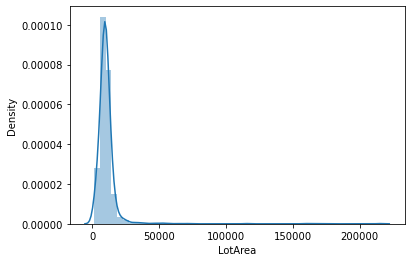

In [7401]:
# Visualizing LotArea numerical variables

sns.distplot(housing_data['LotArea'])
plt.show()

In [7402]:
# Checking for outliers in LotArea

housing_data[ housing_data['LotArea'] > 100000]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
249  250          50       RL         80.0   159000   Pave  No Alley    Irreg   
313  314          20       RL        150.0   215245   Pave  No Alley    Irreg   
335  336         190       RL         85.0   164660   Grvl  No Alley    Irreg   
706  707          20       RL         80.0   115149   Pave  No Alley    Irreg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
249     Unlevel    AllPub  ...        0    NaN   NaN        Shed     500   
313     Unlevel    AllPub  ...        0    NaN   NaN         NaN       0   
335     Unlevel    AllPub  ...        0    NaN   NaN        Shed     700   
706     Unlevel    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
249      6   2007        WD         Normal     277000  
313      6   2009        WD         Normal     375000  
335      8   2008        WD         Normal     228950  
706      6   2007        WD         Normal     302000  

[4 rows x 81 columns]

In [7403]:
plt.scatter(data=housing_data, x='LotArea', y='SalePrice')
plt.show()

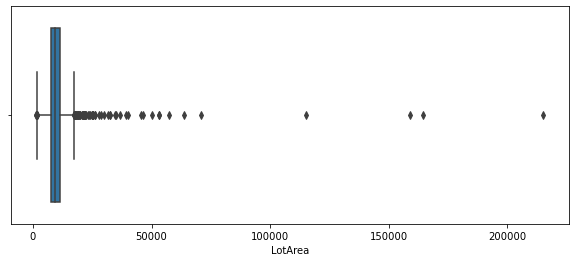

In [7404]:
# Visualising using boxplot

plt.figure(figsize=(10,4))
sns.boxplot(housing_data['LotArea'])
plt.show()

In [7405]:
# Initilizing categorical and numerical vars

ext_categorical_vars = ['LotConfig', 'LotShape']
ext_numerical_vars = ['LotFrontage', 'LotArea']

In [7406]:
# Updating categorical and numerical vars

categorical_vars.extend(ext_categorical_vars)
numerical_vars.extend(ext_numerical_vars)

In [7407]:
print (categorical_vars)
print (numerical_vars)

['MSZoning', 'Neighborhood', 'LandContour', 'LotConfig', 'LotShape']
['SalePrice', 'LotFrontage', 'LotArea']


### Garage features

Features related to garage -> `GarageType` , `GarageYrBlt` , `GarageFinish` , `GarageCars` , `GarageArea` , `GarageQual` , `GarageCond`

**Ordinal features** : `GarageFinish` , `GarageQual` , `GarageCond`

**Categorical variables** : `GarageType`

**Numerical variables** : `GarageCars` , `GarageArea`

In [7408]:
housing_data['GarageYrBlt'].isnull().sum()

81

In [7409]:
# Imputing GarageYrBlt values with 0 indicating No garage.

housing_data['GarageYrBlt'].fillna(0, inplace=True)

In [7410]:
# Inspecting GarageYrBlt to understand the type of data
housing_data['GarageYrBlt'].describe()

count    1440.000000
mean     1866.867361
std       456.558372
min         0.000000
25%      1958.000000
50%      1977.000000
75%      2000.250000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [7411]:
housing_data['GarageYrBlt'].isnull().sum()

0

In [7412]:
housing_data['GarageAge'] = housing_data['YrSold'] - housing_data['GarageYrBlt']

# Dropping the feature GarageYrBlt
housing_data.drop('GarageYrBlt', axis = 1, inplace=True)

In [7413]:
housing_data['GarageType'].astype('category').value_counts()

Attchd     858
Detchd     386
BuiltIn     81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [7414]:
housing_data['GarageType'].isnull().sum()

81

In [7415]:
# Imputing null values with 'No Garage' indicating no garage

housing_data['GarageType'].fillna(value='No Garage', inplace=True)

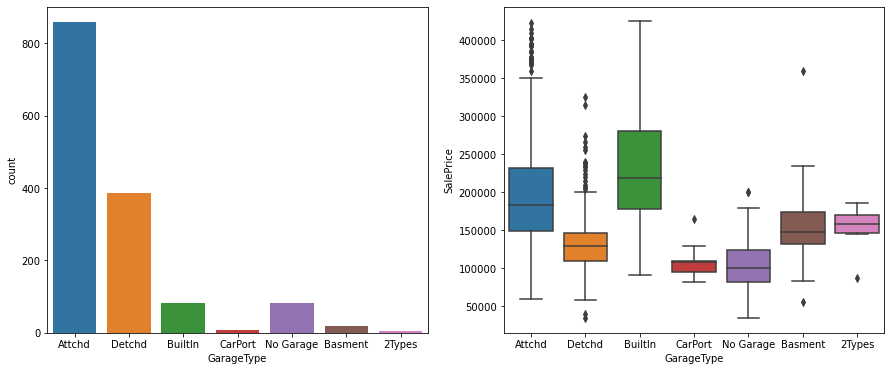

In [7416]:
# Visualising count for GarageType

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['GarageType'])

# SalePrice of properties which different GarageType
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='GarageType', y='SalePrice')

plt.show()

In [7417]:
housing_data['GarageFinish'].astype('category').value_counts()

Unf    604
RFn    417
Fin    338
Name: GarageFinish, dtype: int64

In [7418]:
housing_data['GarageFinish'].isnull().sum()

81

In [7419]:
# Imputing null values with NA indicating no garage

housing_data['GarageFinish'].fillna(value='No Garage', inplace=True)

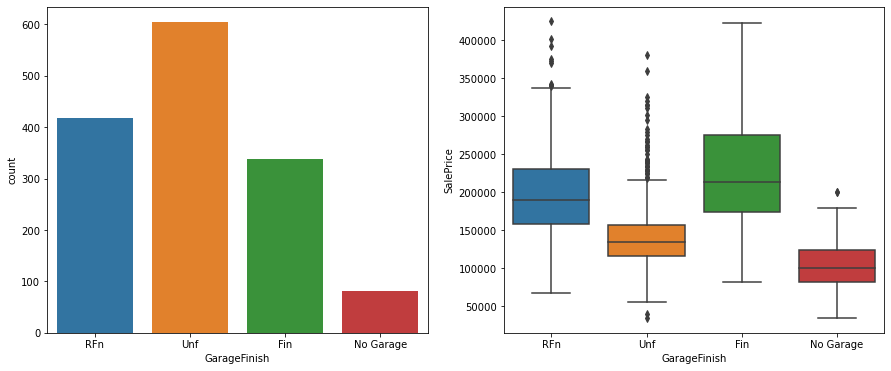

In [7420]:
# Visualising count for GarageFinish

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['GarageFinish'])

# SalePrice of properties which different GarageFinish
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='GarageFinish', y='SalePrice')

plt.show()

In [7421]:
# Converting label to numeric value

housing_data['GarageFinish'].replace({
    'No Garage': 0,
    'Unf': 1, 
    'RFn': 2,
    'Fin': 3
}, inplace=True)

In [7422]:
housing_data['GarageQual'].astype('category').value_counts()

TA    1292
Fa      48
Gd      14
Po       3
Ex       2
Name: GarageQual, dtype: int64

In [7423]:
housing_data['GarageQual'].isnull().sum()

81

In [7424]:
# Imputing null values with NA indicating no garage

housing_data['GarageQual'].fillna(value='No Garage', inplace=True)

In [7425]:
# Visualising count for GarageQual

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['GarageQual'])

# SalePrice of properties which different GarageQual
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='GarageQual', y='SalePrice')

plt.show()

In [7426]:
# Converting label to numeric value

housing_data['GarageQual'].replace({
    'No Garage': 0,
    'Po': 1, 
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}, inplace=True)

In [7427]:
housing_data['GarageCond'].astype('category').value_counts()

TA    1306
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [7428]:
housing_data['GarageCond'].isnull().sum()

81

In [7429]:
# Imputing null values with NA indicating no garage

housing_data['GarageCond'].fillna(value='No Garage', inplace=True)

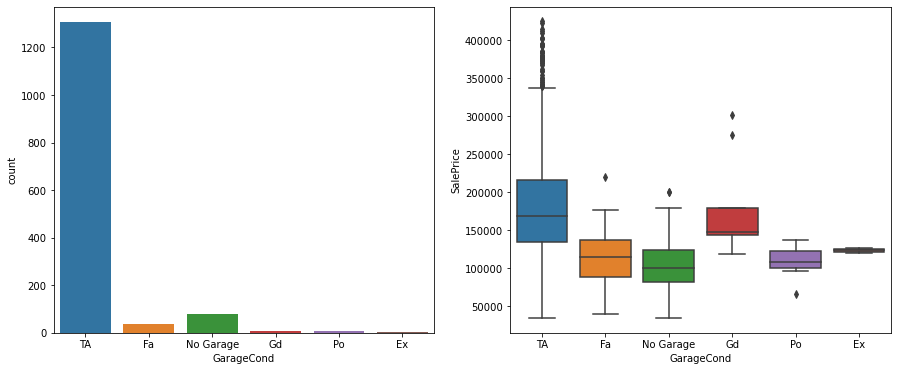

In [7430]:
# Visualising count for GarageCond

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['GarageCond'])

# SalePrice of properties which different GarageCond
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='GarageCond', y='SalePrice')

plt.show()

We can choose not to use GarageCond as it seems be highly correlated to GarageQual which we can see from the plot.

In [7431]:
housing_data['GarageCars'].value_counts()

2    823
1    369
3    162
0     81
4      5
Name: GarageCars, dtype: int64

In [7432]:
# Visualising count for GarageCars

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['GarageCars'])

# SalePrice of properties which different GarageCars
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='GarageCars', y='SalePrice')

plt.show()

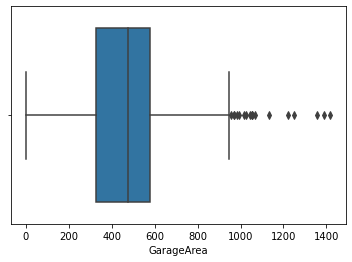

In [7433]:
# Visualising GarageArea

sns.boxplot(housing_data['GarageArea'])
plt.show()

In [7434]:
# Visualising plot for GarageArea against SalePrice

plt.figure(figsize=(8,6))
plt.scatter(data=housing_data, x='GarageArea', y='SalePrice')
plt.show()

In [7435]:
garage_categorical_vars = ['GarageType']
garage_numerical_vars = ['GarageAge', 'GarageCars', 'GarageArea', 'GarageFinish', 'GarageQual']

In [7436]:
categorical_vars.extend(garage_categorical_vars)
numerical_vars.extend(garage_numerical_vars)

print (categorical_vars)
print (numerical_vars)

['MSZoning', 'Neighborhood', 'LandContour', 'LotConfig', 'LotShape', 'GarageType']
['SalePrice', 'LotFrontage', 'LotArea', 'GarageAge', 'GarageCars', 'GarageArea', 'GarageFinish', 'GarageQual']


### Property exteriors and facilities
All features related to exterior attributes of the property like fencing, pool, etc and facilities -> `Utilities` , `PoolArea` , `PoolQC` , `Fence` , `MiscFeature` , `MiscVal`

**Ordinal features** : `Fence`

**Categorical variables** : `Utilities` , `PoolQC` , `MiscFeature`

**Numerical variables** : `PoolArea` , `MiscVal`

In [7437]:
housing_data['Utilities'].astype('category').value_counts()

AllPub    1439
NoSeWa       1
Name: Utilities, dtype: int64

Since there is only 1 property with **NoSeWa** utility and all other rows are with **AllPub**, we can avoid using this column for analysis.

In [7438]:
housing_data['PoolQC'].astype('category').value_counts()

Gd    3
Fa    2
Ex    1
Name: PoolQC, dtype: int64

Only 7 properties have the values of **PoolQC**. We will drop this feature along with `PoolArea`

In [7439]:
housing_data['PoolArea'].value_counts()

0      1434
480       1
512       1
519       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

In [7440]:
# Dropping PoolQC and PoolArea
housing_data.drop(['PoolQC', 'PoolArea'], axis=1, inplace=True)

In [7441]:
housing_data['Fence'].astype('category').value_counts()

MnPrv    156
GdPrv     58
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [7442]:
# Imputing NaN values with 'NA' values indicating no fencing in the property
housing_data['Fence'].fillna(value='No Fence', inplace=True)

In [7443]:
housing_data['Fence'].astype('category').value_counts()

No Fence    1161
MnPrv        156
GdPrv         58
GdWo          54
MnWw          11
Name: Fence, dtype: int64

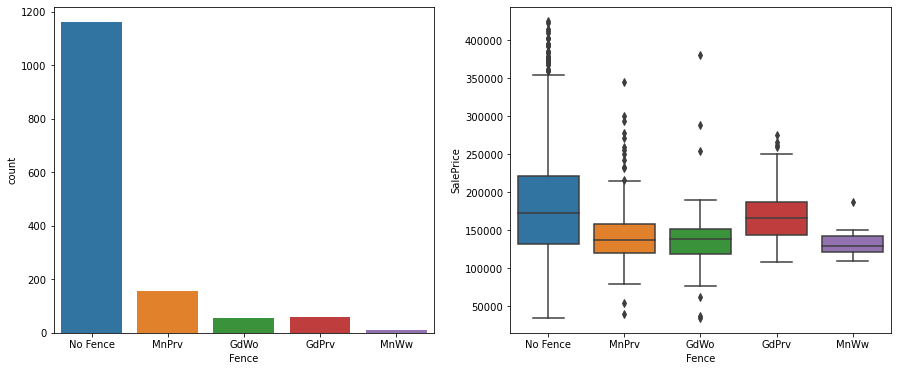

In [7444]:
# Visualising count for Fence

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['Fence'])

# SalePrice of properties which different Fence categories
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='Fence', y='SalePrice')

plt.show()

In [7445]:
# Converting label to numeric value

housing_data['Fence'].replace({
    'No Fence': 0,
    'MnWw': 1, 
    'GdWo': 2,
    'MnPrv': 3,
    'GdPrv': 4
}, inplace=True)

In [7446]:
housing_data['MiscFeature'].astype('category').value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [7447]:
housing_data['MiscVal'].describe()

count     1440.000000
mean        44.093056
std        499.532145
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

In [7448]:
# Dropping both MiscFeature and MiscVal columns
housing_data.drop(['MiscFeature', 'MiscVal'], axis = 1, inplace=True)
housing_data.shape

(1440, 77)

In [7449]:
ext_fac_num_vars = ['Fence']

In [7450]:
numerical_vars.extend(ext_fac_num_vars)

print (categorical_vars)
print (numerical_vars)

['MSZoning', 'Neighborhood', 'LandContour', 'LotConfig', 'LotShape', 'GarageType']
['SalePrice', 'LotFrontage', 'LotArea', 'GarageAge', 'GarageCars', 'GarageArea', 'GarageFinish', 'GarageQual', 'Fence']


### House architectural features
House dwelling architecture and construction material used in building the house -> `MSSubClass` , `BldgType` , `HouseStyle`  , `RoofStyle` , `RoofMatl` , `Exterior1st` , `Exterior2nd` , `MasVnrType` , `MasVnrArea` , `Foundation`

**Categorical variables** : `MSSubClass` , `BldgType` , `HouseStyle`  , `RoofStyle` , `RoofMatl` , `Exterior1st` , `Exterior2nd` , `MasVnrType` , `Foundation`

**Numerical variables** : `MasVnrArea`

In [7451]:
housing_data['MSSubClass'].astype('category').value_counts()

20     529
60     287
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      15
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [7452]:
# Visualising count for MSSubClass

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['MSSubClass'])

# SalePrice of properties which different MSSubClass categories
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='MSSubClass', y='SalePrice')

plt.show()

In [7453]:
# Replacing numbers with actual labels for better understanding
housing_data['MSSubClass'].replace({
    20: '1-STORY 1946 & NEWER ALL STYLES',
    30: '1-STORY 1945 & OLDER',
    40: '1-STORY W/FINISHED ATTIC ALL AGES',
    45: '1-1/2 STORY - UNFINISHED ALL AGES',
    50: '1-1/2 STORY FINISHED ALL AGES',
    60: '2-STORY 1946 & NEWER',
    70: '2-STORY 1945 & OLDER',
    75: '2-1/2 STORY ALL AGES',
    80: 'SPLIT OR MULTI-LEVEL',
    85: 'SPLIT FOYER',
    90: 'DUPLEX - ALL STYLES AND AGES',
   120: '1-STORY PUD - 1946 & NEWER',
   150: '1-1/2 STORY PUD - ALL AGES',
   160: '2-STORY PUD - 1946 & NEWER',
   180: 'PUD MULTILEVEL INCL SPLIT LEV/FOYER',
   190: '2 FAMILY CONVERSION - ALL STYLES AND AGES',
}, inplace=True)

In [7454]:
housing_data['BldgType'].astype('category').value_counts()

1Fam      1200
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

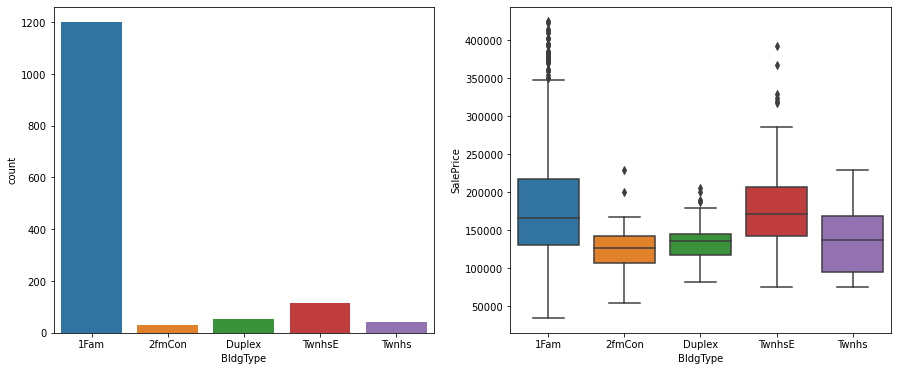

In [7455]:
# Visualising count for BldgType

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['BldgType'])

# SalePrice of properties which different BldgType categories
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='BldgType', y='SalePrice')

plt.show()

In [7456]:
housing_data['HouseStyle'].astype('category').value_counts()

1Story    719
2Story    433
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      7
Name: HouseStyle, dtype: int64

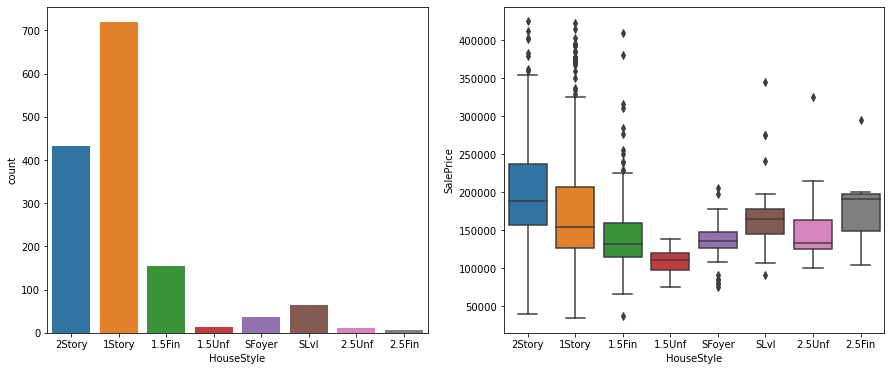

In [7457]:
# Visualising count for HouseStyle

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['HouseStyle'])

# SalePrice of properties which different HouseStyle categories
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='HouseStyle', y='SalePrice')

plt.show()

In [7458]:
housing_data['RoofStyle'].astype('category').value_counts()

Gable      1135
Hip         272
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [7459]:
plt.figure(figsize=(8,6))
sns.countplot(housing_data['RoofStyle'])
plt.show()

In [7460]:
housing_data['RoofMatl'].astype('category').value_counts()

CompShg    1416
Tar&Grv      11
WdShake       5
WdShngl       4
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

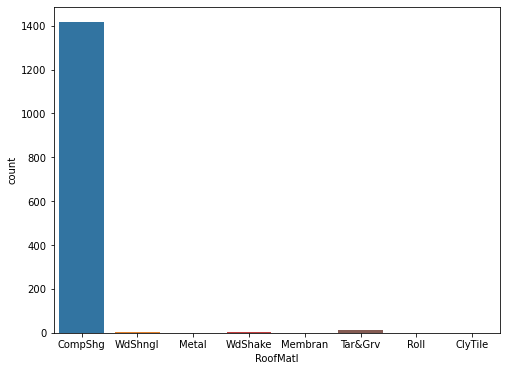

In [7461]:
plt.figure(figsize=(8,6))
sns.countplot(housing_data['RoofMatl'])
plt.show()

**We won't be using this variable for our analysis**

In [7462]:
housing_data['Exterior1st'].astype('category').value_counts()

VinylSd    504
HdBoard    220
MetalSd    220
Wd Sdng    204
Plywood    108
CemntBd     57
BrkFace     49
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

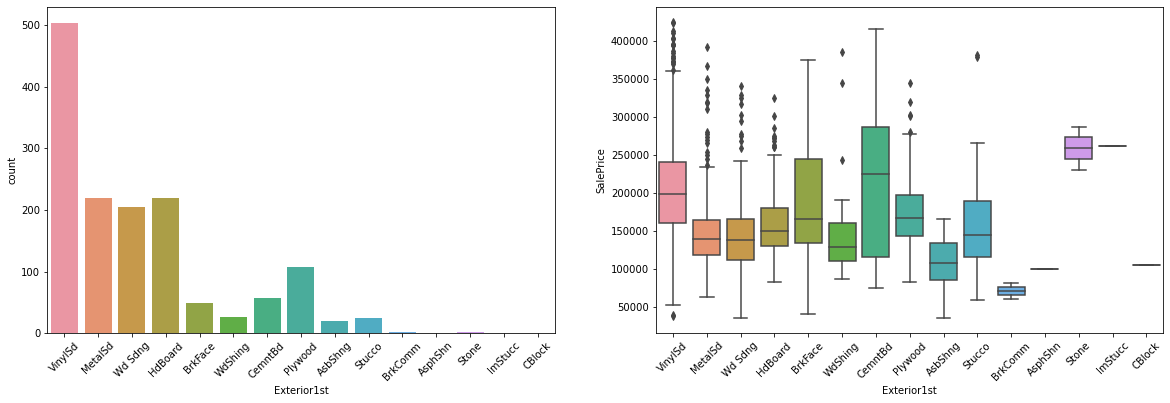

In [7463]:

# Visualising count for Exterior1st

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.xticks(rotation=45)
sns.countplot(housing_data['Exterior1st'])

# SalePrice of properties which different Exterior1st categories
plt.subplot(1, 2, 2)
plt.xticks(rotation=45)
sns.boxplot(data = housing_data, x='Exterior1st', y='SalePrice')

plt.show()

In [7464]:
housing_data['Exterior2nd'].astype('category').value_counts()

VinylSd    493
MetalSd    214
HdBoard    205
Wd Sdng    196
Plywood    142
CmentBd     57
Wd Shng     37
Stucco      26
BrkFace     24
AsbShng     20
ImStucc      9
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [7465]:
# Visualising count for Exterior2nd

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.xticks(rotation=45)
sns.countplot(housing_data['Exterior2nd'])

# SalePrice of properties which different Exterior2nd categories
plt.subplot(1, 2, 2)
plt.xticks(rotation=45)
sns.boxplot(data = housing_data, x='Exterior2nd', y='SalePrice')

plt.show()

In [7466]:
housing_data['MasVnrType'].astype('category').value_counts()

None       861
BrkFace    438
Stone      119
BrkCmn      15
Name: MasVnrType, dtype: int64

In [7467]:
# Checking the count of NaN 

housing_data['MasVnrType'].isnull().sum()

7

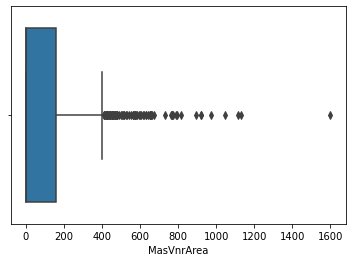

In [7468]:
sns.boxplot(housing_data['MasVnrArea'])
plt.show()

In [7469]:
# Checking the statistical figures for MasVnrArea. 
housing_data['MasVnrArea'].describe()

count    1433.000000
mean       97.927425
std       169.075928
min         0.000000
25%         0.000000
50%         0.000000
75%       160.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [7470]:
plt.scatter(data=housing_data, x='MasVnrArea', y='SalePrice')
plt.show()

In [7471]:
housing_data['MasVnrArea'].isnull().sum()

7

In [7472]:
# Checking the value of MasVnrType for which the area is NaN. 
# If it is None, we can mark those values as 0 indicating no masonry veneer

housing_data[ housing_data['MasVnrArea'].isnull()]['MasVnrType']

234     NaN
529     NaN
650     NaN
936     NaN
973     NaN
977     NaN
1278    NaN
Name: MasVnrType, dtype: object

In [7473]:
housing_data['MasVnrArea'].fillna(value=0, inplace=True)

In [7474]:
housing_data['MasVnrType'].fillna(value='None', inplace=True)

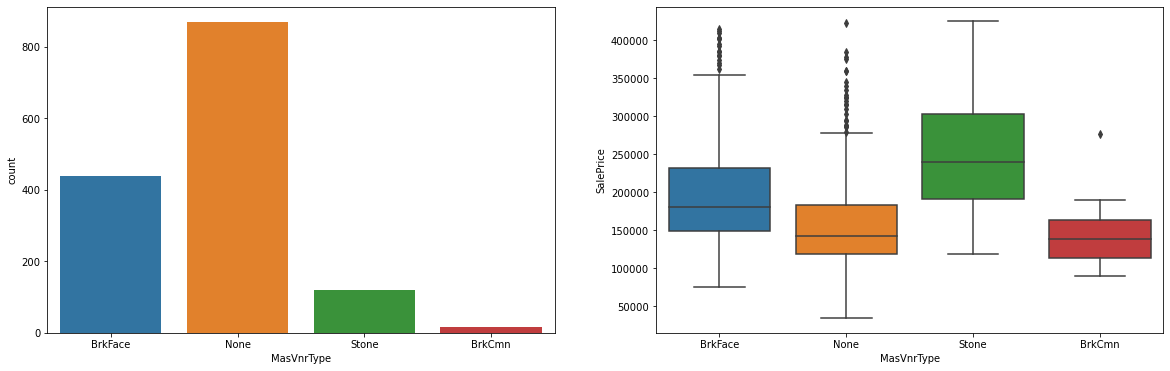

In [7475]:
# Visualising count for MasVnrType

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['MasVnrType'])

# SalePrice of properties which different MasVnrType categories
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='MasVnrType', y='SalePrice')

plt.show()

In [7476]:
housing_data['Foundation'].astype('category').value_counts()

CBlock    634
PConc     628
BrkTil    145
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [7477]:
# Visualising count for Foundation

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['Foundation'])

# SalePrice of properties which different Foundation categories
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='Foundation', y='SalePrice')

plt.show()

In [7478]:
categorical_vars.extend(['MSSubClass', 
                         'BldgType', 
                         'HouseStyle', 
                         'RoofStyle',
                         'Exterior1st', 
                         'Exterior2nd', 
                         'MasVnrType', 
                         'Foundation'])
numerical_vars.extend(['MasVnrArea'])

In [7479]:
print (categorical_vars)
print (numerical_vars)

['MSZoning', 'Neighborhood', 'LandContour', 'LotConfig', 'LotShape', 'GarageType', 'MSSubClass', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation']
['SalePrice', 'LotFrontage', 'LotArea', 'GarageAge', 'GarageCars', 'GarageArea', 'GarageFinish', 'GarageQual', 'Fence', 'MasVnrArea']


### Basement attributes
All features related to basement -> `BsmtQual` , `BsmtCond` , `BsmtExposure` , `BsmtFinType1` , `BsmtFinSF1` , `BsmtFinType2` , `BsmtFinSF2` , `BsmtUnfSF` , `TotalBsmtSF` , `BsmtFullBath` , `BsmtHalfBath`

**Ordinal features** : `BsmtQual` , `BsmtCond` , `BsmtExposure` , `BsmtFinType1` , `BsmtFinType2`

**Numerical variables** : `BsmtFinSF1` , `BsmtFinSF2` , `BsmtUnfSF` , `TotalBsmtSF` , `BsmtFullBath` , `BsmtHalfBath`

In [7480]:
basement_vars = ['BsmtQual' ,
                 'BsmtCond' , 
                 'BsmtExposure' , 
                 'BsmtFinType1' , 
                 'BsmtFinSF1' , 
                 'BsmtFinType2' , 
                 'BsmtFinSF2' , 
                 'BsmtUnfSF' , 
                 'TotalBsmtSF',
                 'BsmtFullBath',
                 'BsmtHalfBath']

In [7481]:
housing_data['BsmtFullBath'].astype('category').value_counts()

0    850
1    574
2     15
3      1
Name: BsmtFullBath, dtype: int64

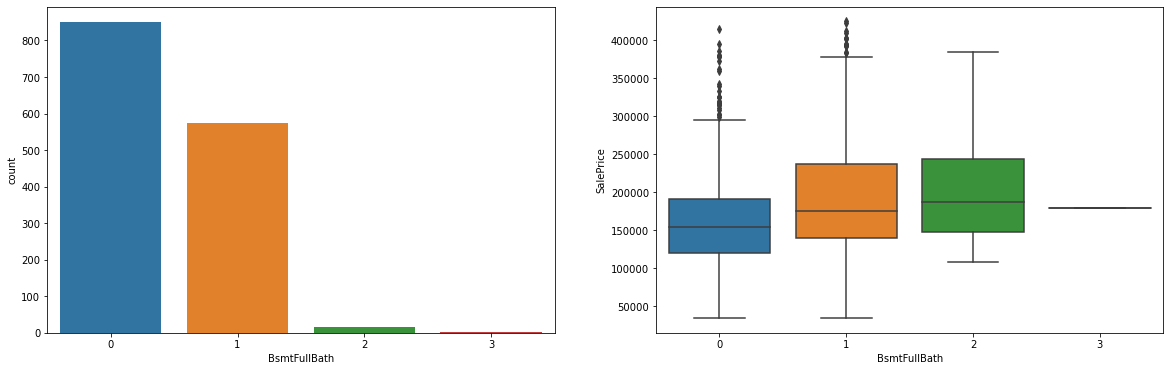

In [7482]:
# Visualising count for BsmtFullBath

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['BsmtFullBath'])

# SalePrice of properties which different BsmtFullBath categories
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='BsmtFullBath', y='SalePrice')

plt.show()

In [7483]:
housing_data['BsmtHalfBath'].astype('category').value_counts()

0    1359
1      79
2       2
Name: BsmtHalfBath, dtype: int64

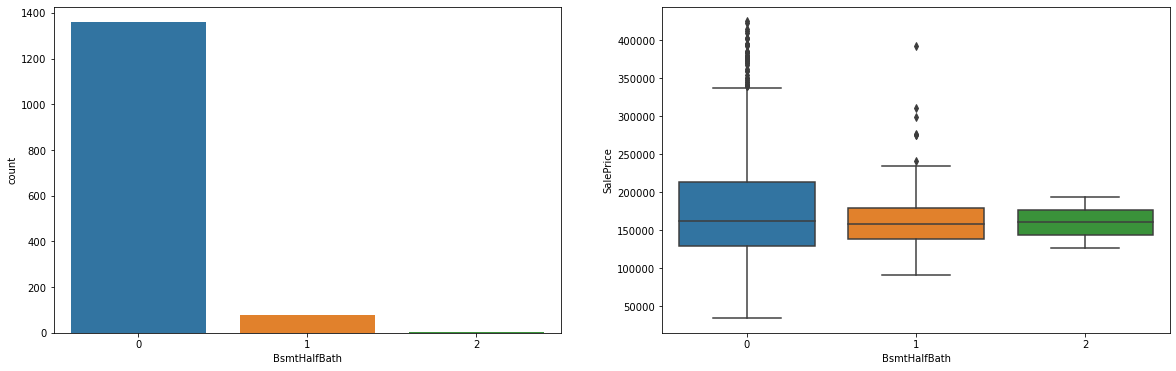

In [7484]:
# Visualising count for BsmtHalfBath

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['BsmtHalfBath'])

# SalePrice of properties which different BsmtHalfBath categories
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='BsmtHalfBath', y='SalePrice')

plt.show()

**We won't use this feature due to class imbalance**

In [7485]:
housing_data['BsmtExposure'].astype('category').value_counts()

No    949
Av    217
Gd    123
Mn    113
Name: BsmtExposure, dtype: int64

In [7486]:
# Checking for NaN values which might indicate absence of basement
housing_data['BsmtExposure'].isnull().sum()

38

In [7487]:
housing_basement_empty_data = housing_data[ housing_data['BsmtExposure'].isnull()][basement_vars]
housing_basement_empty_data.drop_duplicates(inplace=True)
housing_basement_empty_data

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
17       NaN      NaN          NaN          NaN           0          NaN   
948       Gd       TA          NaN          Unf           0          Unf   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  
17            0          0            0             0             0  
948           0        936          936             0             0

From the data above, we can see that out of **38** properties which had null values for **BsmtExposure**, there is 1 property for which we have data against other basement features but BsmtExposure is marked as null. We can impute the value of BsmtExposure for that 1 row as 'No Exposure' basement. For the other 37 rows, we can impute 'NA' values indicating no basement

In [7488]:
# Setting the value of BsmtExposure to 'No' for property id 948
housing_data.at[948, 'BsmtExposure'] = 'No'

# Setting the value of BsmtExposure to 'NA' for other 37 properties will null values
housing_data['BsmtExposure'].fillna(value='No Basement', inplace=True)

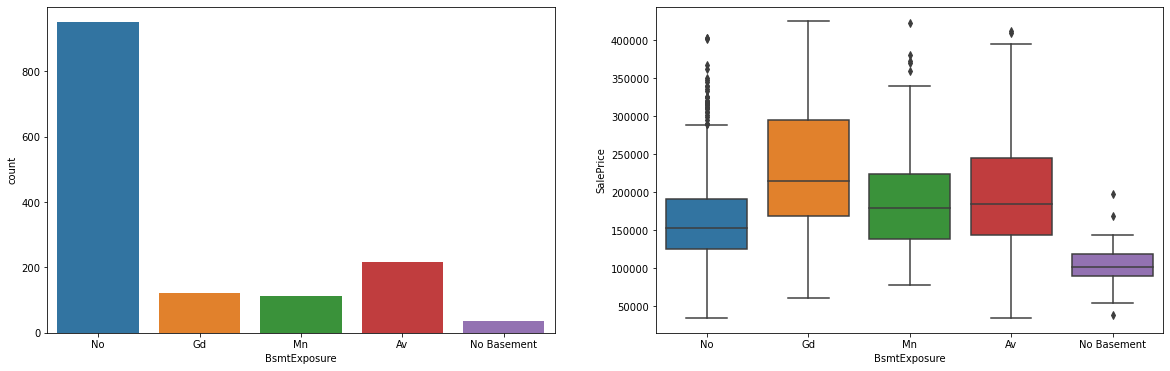

In [7489]:
# Visualising count for BsmtExposure

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['BsmtExposure'])

# SalePrice of properties which different BsmtExposure categories
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='BsmtExposure', y='SalePrice')

plt.show()

In [7490]:
# Converting label to numeric value

housing_data['BsmtExposure'].replace({
    'No Basement': 0,
    'No': 1,
    'Mn': 2, 
    'Av': 3,
    'Gd': 4
}, inplace=True)

In [7491]:
housing_data['BsmtFinType1'].astype('category').value_counts()

Unf    426
GLQ    403
ALQ    219
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [7492]:
# Setting the value of BsmtFinType1 to 'NA' containing NaN values
housing_data['BsmtFinType1'].fillna(value='No Basement', inplace=True)

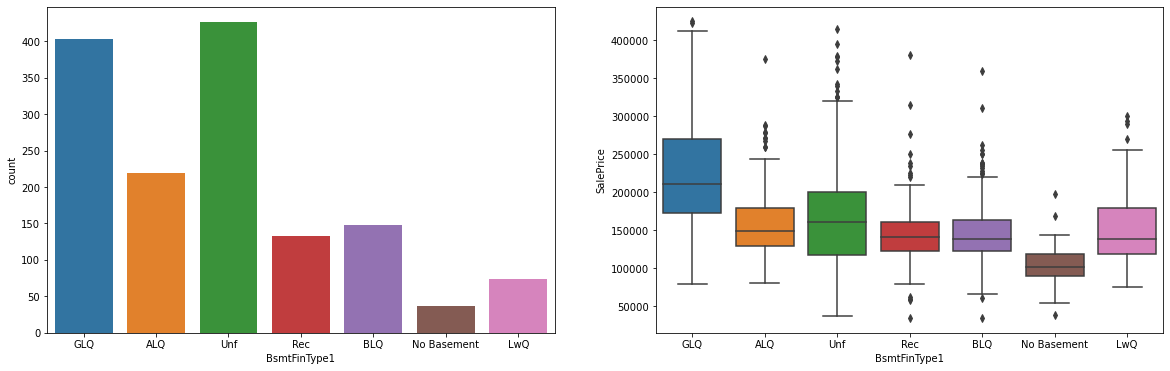

In [7493]:
# Visualising count for BsmtFinType1

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['BsmtFinType1'])

# SalePrice of properties which different BsmtFinType1 categories
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='BsmtFinType1', y='SalePrice')

plt.show()

In [7494]:
# Converting label to numeric value

housing_data['BsmtFinType1'].replace({
    'No Basement': 0,
    'Unf': 1, 
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}, inplace=True)

In [7495]:
plt.figure(figsize=(8,6))
plt.scatter(data=housing_data, x='BsmtFinSF1', y='SalePrice')
plt.show()

In [7496]:
housing_data['BsmtFinType2'].astype('category').value_counts()

Unf    1237
Rec      54
LwQ      46
BLQ      33
ALQ      18
GLQ      14
Name: BsmtFinType2, dtype: int64

In [7497]:
# Setting the value of BsmtFinType2 to 'NA' containing NaN values indicating 'No basement'
housing_data['BsmtFinType2'].fillna(value='No Basement', inplace=True)

In [7498]:
# Visualising count for BsmtFinType2

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['BsmtFinType2'])

# SalePrice of properties which different BsmtFinType2 categories
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='BsmtFinType2', y='SalePrice')

plt.show()

**Since most of the finishing type is Unf, we will just use BsmtFinType1 variable for our analysis.**

In [7499]:
# Visualising BsmtFinSF2 against SalePrice

plt.figure(figsize=(8,6))
plt.scatter(data=housing_data, x='BsmtFinSF2', y='SalePrice')
plt.xlabel("Basement finished type 2 sq. ft.")
plt.ylabel("Sale Price")
plt.show()

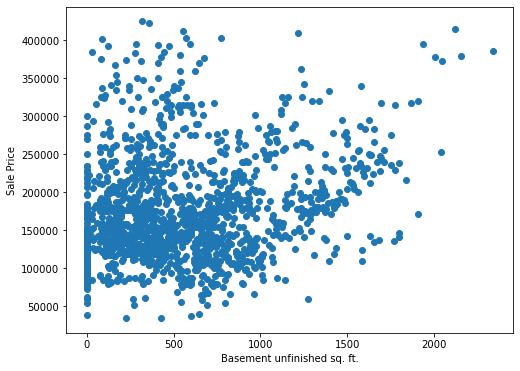

In [7500]:
# Visualising BsmtUnfSF against SalePrice

plt.figure(figsize=(8,6))
plt.scatter(data=housing_data, x='BsmtUnfSF', y='SalePrice')
plt.xlabel("Basement unfinished sq. ft.")
plt.ylabel("Sale Price")
plt.show()

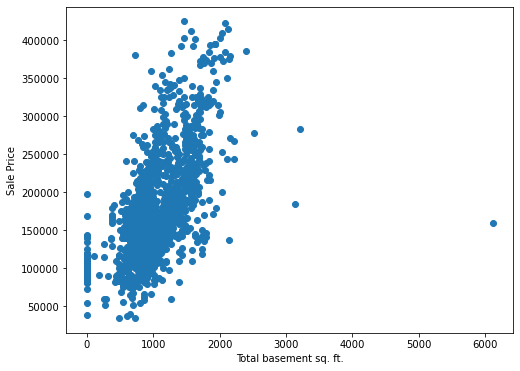

In [7501]:
# Visualising TotalBsmtSF against SalePrice

plt.figure(figsize=(8,6))
plt.scatter(data=housing_data, x='TotalBsmtSF', y='SalePrice')
plt.xlabel("Total basement sq. ft.")
plt.ylabel("Sale Price")
plt.show()

In [7502]:
housing_data['BsmtQual'].astype('category').value_counts()

TA    648
Gd    616
Ex    104
Fa     35
Name: BsmtQual, dtype: int64

In [7503]:
# Setting the value of BsmtQual to 'NA' containing NaN values
housing_data['BsmtQual'].fillna(value='No Basement', inplace=True)

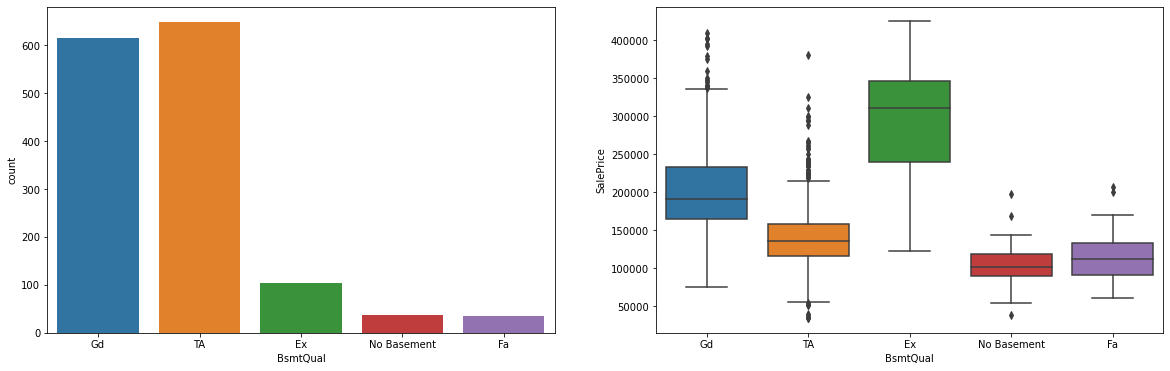

In [7504]:
# Visualising count for BsmtQual

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['BsmtQual'])

# SalePrice of properties which different BsmtQual categories
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='BsmtQual', y='SalePrice')

plt.show()

In [7505]:
# Converting label to numeric value

housing_data['BsmtQual'].replace({
    'No Basement': 0,
    'Fa': 1, 
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}, inplace=True)

In [7506]:
housing_data['BsmtCond'].astype('category').value_counts()

TA    1292
Gd      64
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [7507]:
# Setting the value of BsmtCond to 'NA' containing NaN values
housing_data['BsmtCond'].fillna(value='No Basement', inplace=True)

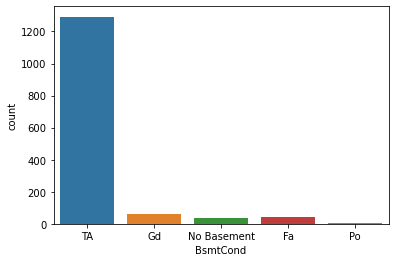

In [7508]:
sns.countplot(housing_data['BsmtCond'])
plt.show()

**We won't use this feature due to class imbalance**

In [7509]:
# Converting label to numeric value

housing_data['BsmtCond'].replace({
    'No Basement': 0,
    'Po': 1, 
    'Fa': 2,
    'TA': 3,
    'Gd': 4
}, inplace=True)

In [7510]:
basement_numerical_vars = ['BsmtQual',
                           'BsmtExposure',
                           'BsmtFinType1',
                           'BsmtFinSF1',
                           'BsmtUnfSF',
                           'TotalBsmtSF',
                           'BsmtFullBath']

In [7511]:
# Updating the numerical features

numerical_vars.extend(basement_numerical_vars)

In [7512]:
print (categorical_vars)
print ("----------------")
print (numerical_vars)

['MSZoning', 'Neighborhood', 'LandContour', 'LotConfig', 'LotShape', 'GarageType', 'MSSubClass', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation']
----------------
['SalePrice', 'LotFrontage', 'LotArea', 'GarageAge', 'GarageCars', 'GarageArea', 'GarageFinish', 'GarageQual', 'Fence', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath']


### House quality
Exterior conditions and quality of the house -> `OverallQual` , `OverallCond` , `ExterQual` , `ExterCond`

**Ordinal features** : `ExterQual` , `ExterCond`

**Numerical variables** : `OverallQual` , `OverallCond`

In [7513]:
housing_data['OverallQual'].astype('category').value_counts()

5     397
6     374
7     319
8     165
4     116
9      36
3      20
10      8
2       3
1       2
Name: OverallQual, dtype: int64

In [7514]:
# Visualising count for OverallQual

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['OverallQual'])

# SalePrice of properties which different OverallQual categories
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='OverallQual', y='SalePrice')

plt.show()

Properties with high overall quality have high selling price. We can see very good correlation from the boxplot above

In [7515]:
housing_data['OverallCond'].astype('category').value_counts()

5    803
6    251
7    205
8     72
4     57
3     25
9     21
2      5
1      1
Name: OverallCond, dtype: int64

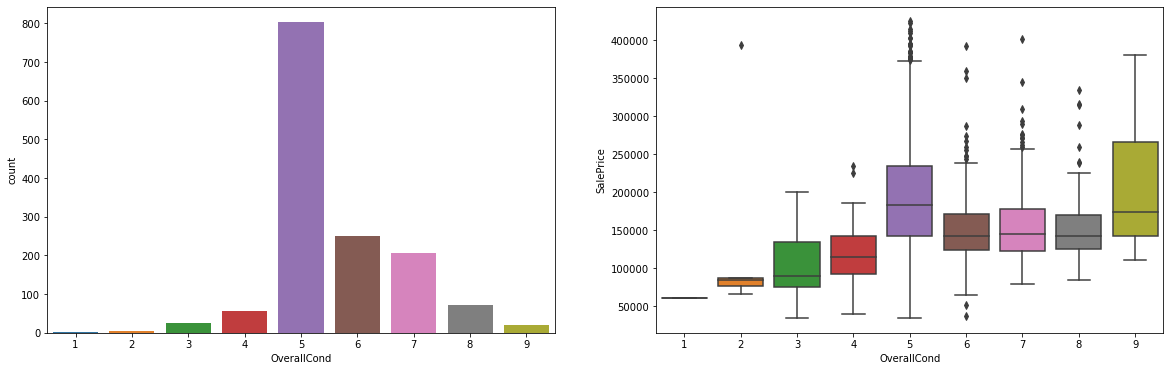

In [7516]:
# Visualising count for OverallCond

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['OverallCond'])

# SalePrice of properties which different OverallCond categories
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='OverallCond', y='SalePrice')

plt.show()

**We will use just OverallQual as OverallCond also resembles the OverallQual which is overall condition of the house**

In [7517]:
housing_data['ExterQual'].astype('category').value_counts()

TA    906
Gd    482
Ex     38
Fa     14
Name: ExterQual, dtype: int64

In [7518]:
# Visualising count for ExterQual

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['ExterQual'])

# SalePrice of properties which different ExterQual categories
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='ExterQual', y='SalePrice')

plt.show()

Properties with great exterior quality have been sold at higher price

In [7519]:
# Converting label to numeric value

housing_data['ExterQual'].replace({
    'Fa': 0,
    'TA': 1, 
    'Gd': 2,
    'Ex': 3
}, inplace=True)

In [7520]:
housing_data['ExterCond'].astype('category').value_counts()

TA    1264
Gd     144
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [7521]:
sns.countplot(housing_data['ExterCond'])
plt.show()

**Since most of the condition is typically average, we won't use this variable for analysis.**

In [7522]:
house_quality_numerical_vars = ['OverallQual', 'ExterQual']

In [7523]:
# Updating the numerical variables

numerical_vars.extend(house_quality_numerical_vars)
print (categorical_vars)

['MSZoning', 'Neighborhood', 'LandContour', 'LotConfig', 'LotShape', 'GarageType', 'MSSubClass', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation']


### Porch area features
These features tells us about the area in sq. ft. of the porch area in the property -> `WoodDeckSF` , `OpenPorchSF` , `EnclosedPorch` , `3SsnPorch` , `ScreenPorch`

**Numerical variables** : `WoodDeckSF` , `OpenPorchSF` , `EnclosedPorch` , `3SsnPorch` , `ScreenPorch`

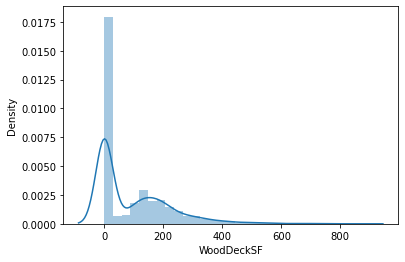

In [7524]:
# WoodDeckSF : Area in sq. ft. of porch made essentially with wood

sns.distplot(housing_data['WoodDeckSF'])
plt.show()

In [7525]:
# OpenPorchSF : Area in sq. ft. of porch which is open to outside air

sns.distplot(housing_data['OpenPorchSF'])
plt.show()

In [7526]:
# EnclosedPorch : Area in sq. ft. of porch which is closed to outside air and has walls surrounding them.

sns.distplot(housing_data['EnclosedPorch'])
plt.show()

In [7527]:
# Number of properties containing 3SsnPorch
housing_data[ housing_data['EnclosedPorch'] > 0 ].shape[0]

206

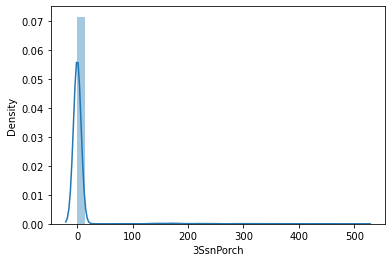

In [7528]:
# 3SsnPorch : Area in sq. ft. of 3-season porch which has usually windows 
# and is suitable for unpleasant weather, cold and spring season allowing us to close the windows.

sns.distplot(housing_data['3SsnPorch'])
plt.show()

In [7529]:
# Number of properties containing 3SsnPorch
housing_data[ housing_data['3SsnPorch'] > 0 ].shape[0]

24

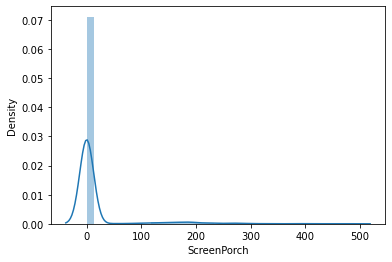

In [7530]:
# ScreenPorch : Area in sq. ft. of Screen porch which has curatins surrounding the porch area.

sns.distplot(housing_data['ScreenPorch'])
plt.show()

In [7531]:
# Number of properties containing ScreenPorch
housing_data[ housing_data['ScreenPorch'] > 0 ].shape[0]

112

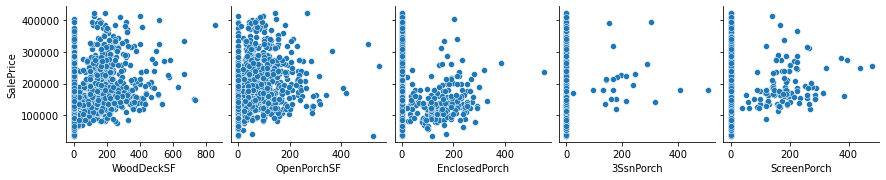

In [7532]:
sns.pairplot(housing_data, 
             x_vars=['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'],
             y_vars='SalePrice')
plt.show()

**We can see skewness of data for 3SsnPorch and ScreenPorch features. We will not use these for our analysis.**

In [7533]:
porch_numerical_variables = ['WoodDeckSF', 'OpenPorchSF']

In [7534]:
# Updating the list of numerical variables

numerical_vars.extend(porch_numerical_variables)
print (numerical_vars)

['SalePrice', 'LotFrontage', 'LotArea', 'GarageAge', 'GarageCars', 'GarageArea', 'GarageFinish', 'GarageQual', 'Fence', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'OverallQual', 'ExterQual', 'WoodDeckSF', 'OpenPorchSF']


### Property interior features
Features such as heating and cooling system, electrical wiring etc -> `Heating` , `HeatingQC` , `CentralAir` , `Electrical` , `Fireplaces` , `FireplaceQu`

**Categorical variables** : `Heating` , `HeatingQC` , `CentralAir` , `Electrical`, `Fireplaces` , `FireplaceQu`

In [7535]:
housing_data['Heating'].astype('category').value_counts()

GasA     1408
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [7536]:
sns.countplot(housing_data['Heating'])
plt.show()

**Due to heavy class imbalance, we will ignore this feature**

In [7537]:
housing_data['HeatingQC'].astype('category').value_counts()

Ex    721
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

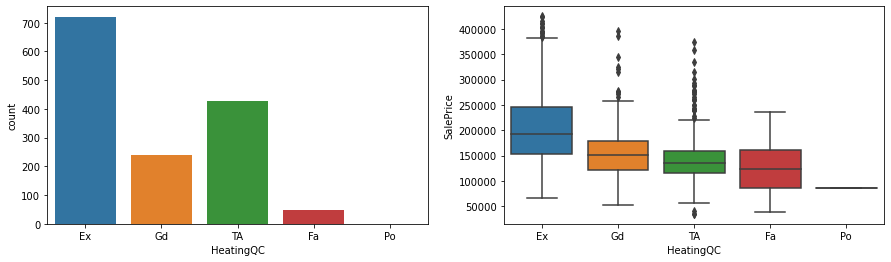

In [7538]:
# Visualising count for HeatingQC

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['HeatingQC'])

# SalePrice of properties which different HeatingQC categories
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='HeatingQC', y='SalePrice')

plt.show()

Properties with excellent heating quality have have selling price.

In [7539]:
# Converting label to numeric value

housing_data['HeatingQC'].replace({
    'Po': 0,
    'Fa': 1, 
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}, inplace=True)

In [7540]:
housing_data['CentralAir'].astype('category').value_counts()

Y    1345
N      95
Name: CentralAir, dtype: int64

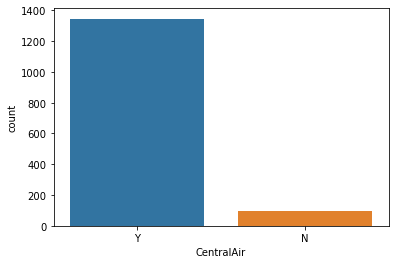

In [7541]:
sns.countplot(housing_data['CentralAir'])
plt.show()

**Avoiding this feature as well due to high class imbalance**

In [7542]:
housing_data['Electrical'].astype('category').value_counts()

SBrkr    1314
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [7543]:
print ("Null values of electrical feature = ", housing_data['Electrical'].isnull().sum())

Null values of electrical feature =  1


In [7544]:
# Imputing the null value with mode() = SBrkr

housing_data['Electrical'].fillna(value='SBrkr', inplace=True)

In [7545]:
sns.countplot(housing_data['Electrical'])
plt.show()

**We won't use this feature as well**

In [7546]:
housing_data['Fireplaces'].astype('category').value_counts()

0    690
1    638
2    107
3      5
Name: Fireplaces, dtype: int64

In [7547]:
# Visualising count for Fireplaces

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['Fireplaces'])

# SalePrice of properties which different number of fireplaces in the property
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='Fireplaces', y='SalePrice')

plt.show()

The more the number of fireplaces, high is the selling price of that property

In [7548]:
housing_data['FireplaceQu'].astype('category').value_counts()

Gd    367
TA    310
Fa     33
Ex     20
Po     20
Name: FireplaceQu, dtype: int64

In [7549]:
# Checking for NaN values

housing_data['FireplaceQu'].isnull().sum()

690

We can see that 690 houses do not have Fireplaces. We can impute **No Fireplace** for these NaN values

In [7550]:
housing_data['FireplaceQu'].fillna(value='No Fireplace', inplace=True)

In [7551]:
# Visualising count for Fireplaces

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['FireplaceQu'])

# SalePrice of properties which different number qualities of fireplaces
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='FireplaceQu', y='SalePrice')

plt.show()

Properties with excellent fireplace quality have been sold at higher price

In [7552]:
# Converting label to numeric value

housing_data['FireplaceQu'].replace({
    'No Fireplace': 0,
    'Po': 1,
    'Fa': 2, 
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}, inplace=True)

In [7553]:
interior_features_numerical_vars = ['HeatingQC', 'Fireplaces', 'FireplaceQu']

In [7554]:
numerical_vars.extend(interior_features_numerical_vars)
print (categorical_vars)
print ("--------------")
print (numerical_vars)

['MSZoning', 'Neighborhood', 'LandContour', 'LotConfig', 'LotShape', 'GarageType', 'MSSubClass', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation']
--------------
['SalePrice', 'LotFrontage', 'LotArea', 'GarageAge', 'GarageCars', 'GarageArea', 'GarageFinish', 'GarageQual', 'Fence', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'OverallQual', 'ExterQual', 'WoodDeckSF', 'OpenPorchSF', 'HeatingQC', 'Fireplaces', 'FireplaceQu']


### House floors and room features
House interiors with details of sq. ft of floors and quality of rooms -> `1stFlrSF` , `2ndFlrSF` , `LowQualFinSF` , `GrLivArea` , `FullBath` , `HalfBath` , `BedroomAbvGr` , `KitchenAbvGr` , `KitchenQual` , `TotRmsAbvGrd` , `Functional`

**Ordinal features** : `KitchenQual` , `Functional`

**Numerical variables** : `FullBath` , `HalfBath` , `BedroomAbvGr` , `KitchenAbvGr` , `TotRmsAbvGrd` , `1stFlrSF` , `2ndFlrSF` , `LowQualFinSF` , `GrLivArea`

In [7555]:
housing_data['FullBath'].astype('category').value_counts()

2    757
1    650
3     24
0      9
Name: FullBath, dtype: int64

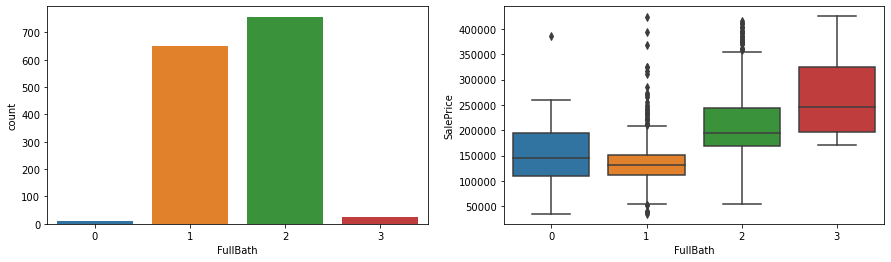

In [7556]:
# Visualising count for FullBath

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['FullBath'])

# SalePrice of properties which different number full bathrooms
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='FullBath', y='SalePrice')

plt.show()

In [7557]:
housing_data['HalfBath'].astype('category').value_counts()

0    909
1    519
2     12
Name: HalfBath, dtype: int64

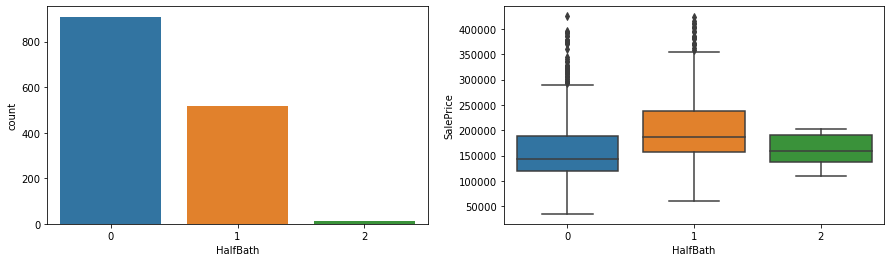

In [7558]:
# Visualising count for HalfBath

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['HalfBath'])

# SalePrice of properties which different number half bathrooms
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='HalfBath', y='SalePrice')

plt.show()

In [7559]:
housing_data['BedroomAbvGr'].astype('category').value_counts()

3    800
2    353
4    203
1     49
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

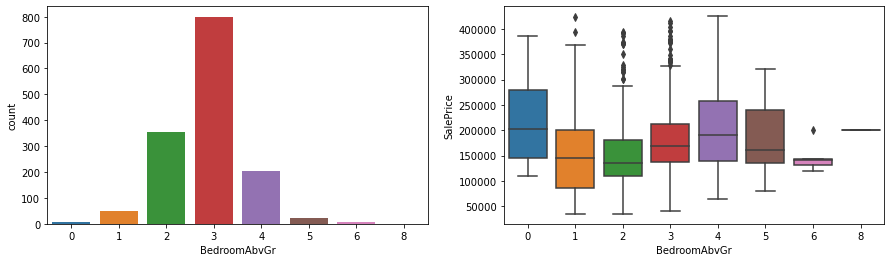

In [7560]:
# Visualising count for BedroomAbvGr

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['BedroomAbvGr'])

# SalePrice of properties which count of bedrooms above grade
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='BedroomAbvGr', y='SalePrice')

plt.show()

In [7561]:
housing_data['KitchenAbvGr'].astype('category').value_counts()

1    1372
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

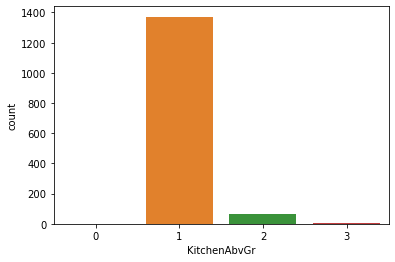

In [7562]:
sns.countplot(housing_data['KitchenAbvGr'])
plt.show()

**Most of the kitchens are above average. So we will not be using this variable for analysis**

In [7563]:
housing_data['KitchenQual'].astype('category').value_counts()

TA    735
Gd    582
Ex     84
Fa     39
Name: KitchenQual, dtype: int64

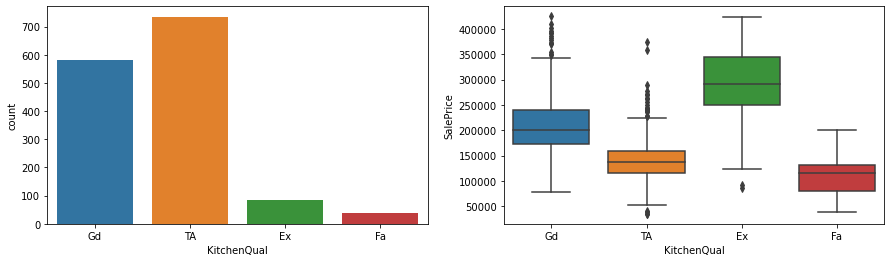

In [7564]:
# Visualising count for KitchenQual

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['KitchenQual'])

# SalePrice of properties with different kitchen qualities
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='KitchenQual', y='SalePrice')

plt.show()

Excellent kitchen quality in homes have been sold at higher price

In [7565]:
# Converting label to numeric value

housing_data['KitchenQual'].replace({
    'Fa': 0, 
    'TA': 1,
    'Gd': 2,
    'Ex': 3
}, inplace=True)

In [7566]:
housing_data['TotRmsAbvGrd'].astype('category').value_counts()

6     402
7     327
5     275
8     186
4      97
9      73
10     39
3      17
11     14
12      8
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

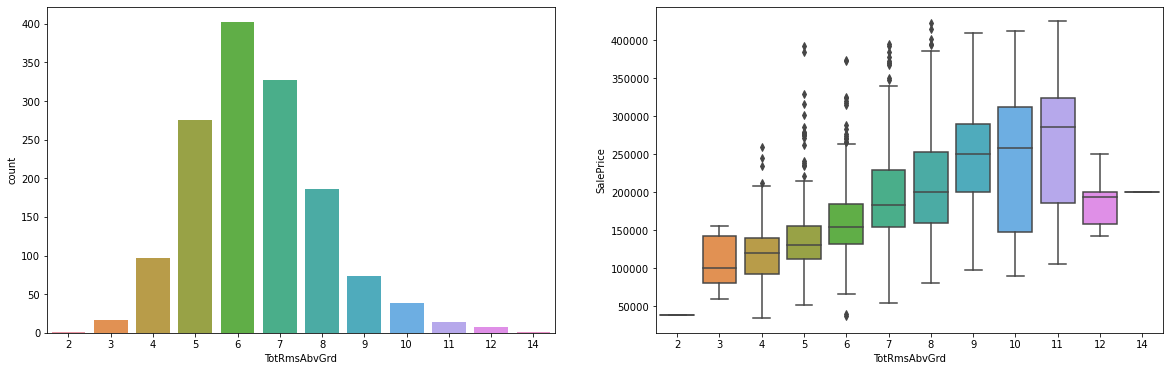

In [7567]:
# Visualising count for TotRmsAbvGrd

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['TotRmsAbvGrd'])

# SalePrice of properties with different counts of TotRmsAbvGrd
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='TotRmsAbvGrd', y='SalePrice')

plt.show()

The higher the number of rooms with above grade, more is the selling price.

In [7568]:
housing_data['Functional'].astype('category').value_counts()

Typ     1341
Min2      34
Min1      31
Maj1      14
Mod       14
Maj2       5
Sev        1
Name: Functional, dtype: int64

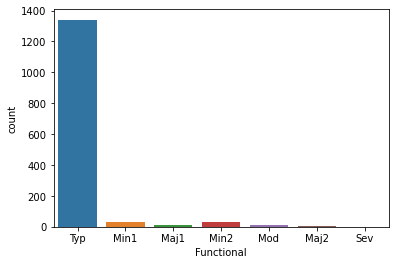

In [7569]:
sns.countplot(housing_data['Functional'])
plt.show()

**Due to class imbalance and skewness, we will avoid using this variable for our analysis**

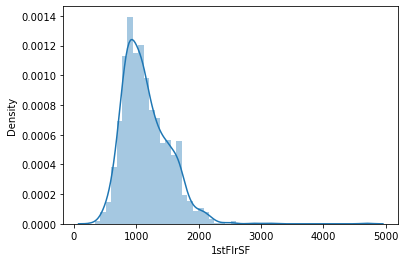

In [7570]:
# Visualising the numerical variable : 1stFlrSF - Area in sq. ft. of 1st floor

sns.distplot(housing_data['1stFlrSF'])
plt.show()

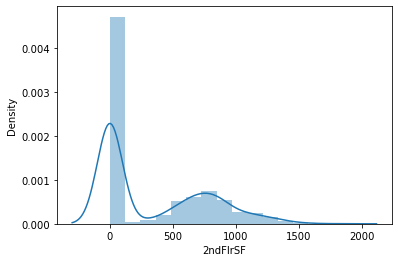

In [7571]:
# Visualising the numerical variable : 2ndFlrSF - Area in sq. ft. of 2nd floor

sns.distplot(housing_data['2ndFlrSF'])
plt.show()

In [7572]:
# Visualising the numerical variable : LowQualFinSF - Area in sq. ft. of low quality finishing in all floors

sns.distplot(housing_data['LowQualFinSF'])
plt.show()

In [7573]:
# Checking the NA or 0 values
print ("NaN values for LowQualFinSF = ", housing_data['LowQualFinSF'].isnull().sum())
print ("Positive values for LowQualFinSF = ", housing_data[ housing_data['LowQualFinSF'] > 0].shape[0])

NaN values for LowQualFinSF =  0
Positive values for LowQualFinSF =  25


In [7574]:
# Visualising the numerical variable : GrLivArea - Area in sq. ft. of above grade living area

sns.distplot(housing_data['GrLivArea'])
plt.show()

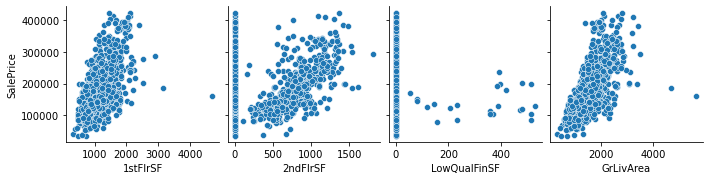

In [7575]:
sns.pairplot(housing_data, 
             x_vars=['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'],
             y_vars='SalePrice')
plt.show()

**Except LowQualFinSF, we will be using other 3 variables.**

In [7576]:
rooms_numerical_vars = ['1stFlrSF', '2ndFlrSF', 'GrLivArea', 
                        'FullBath', 'HalfBath', 'BedroomAbvGr', 
                        'TotRmsAbvGrd', 'KitchenQual']

In [7577]:
# Updating numerical variable list

numerical_vars.extend(rooms_numerical_vars)

In [7578]:
print (categorical_vars)
print ("------------")
print (numerical_vars)

['MSZoning', 'Neighborhood', 'LandContour', 'LotConfig', 'LotShape', 'GarageType', 'MSSubClass', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation']
------------
['SalePrice', 'LotFrontage', 'LotArea', 'GarageAge', 'GarageCars', 'GarageArea', 'GarageFinish', 'GarageQual', 'Fence', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'OverallQual', 'ExterQual', 'WoodDeckSF', 'OpenPorchSF', 'HeatingQC', 'Fireplaces', 'FireplaceQu', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'KitchenQual']


### Property sale date and month
Month and year when the property was sold -> `MoSold` , `YrSold` , `YearBuilt` , `YearRemodAdd`

In [7579]:
housing_data['MoSold'].astype('category').value_counts()

6     250
7     228
5     203
4     139
8     121
3     104
10     88
11     78
9      62
12     59
1      56
2      52
Name: MoSold, dtype: int64

In [7580]:
# Replace numbers with month labels

housing_data['MoSold'].replace({
    1:'Jan', 
    2:'Feb', 
    3:'Mar',
    4:'Apr',
    5:'May',
    6:'Jun',
    7:'Jul',
    8:'Aug',
    9:'Sep',
    10:'Oct',
    11:'Nov',
    12:'Dec'
}, inplace=True)

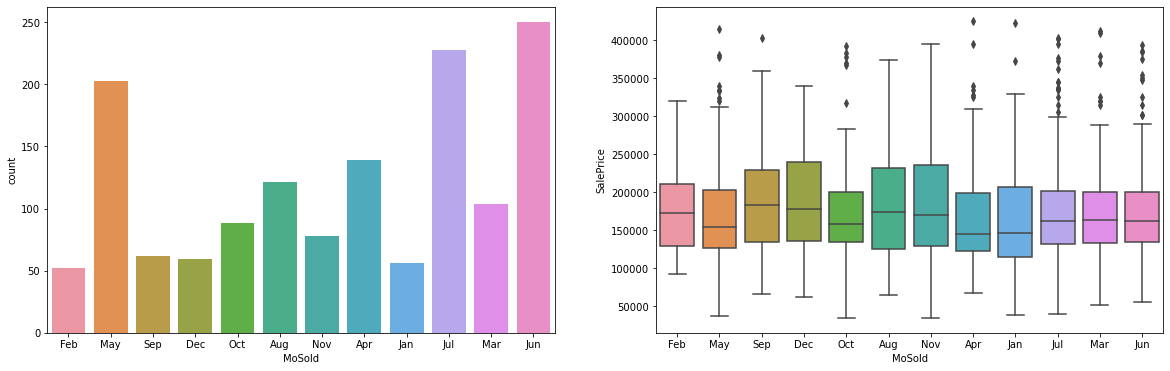

In [7581]:
# Visualising count for MoSold

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(housing_data['MoSold'])

# SalePrice of properties with different counts of MoSold
plt.subplot(1, 2, 2)
sns.boxplot(data = housing_data, x='MoSold', y='SalePrice')

plt.show()

In [7582]:
housing_data['YrSold'].astype('category').value_counts()

2009    333
2007    324
2006    308
2008    302
2010    173
Name: YrSold, dtype: int64

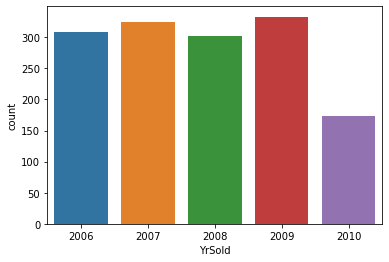

In [7583]:
sns.countplot(housing_data['YrSold'])
plt.show()

In [7584]:
# Deriving HouseAge and HouseRemodelAge using YearBuilt and YearRemodAdd
housing_data['HouseAge'] = housing_data['YrSold'] - housing_data['YearBuilt']
housing_data['HouseRemodelAge'] = housing_data['YrSold'] - housing_data['YearRemodAdd']

In [7585]:
# Dropping the variables YrSold, YearBuilt, YearRemodAdd
housing_data.drop(['YrSold', 'YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)

In [7586]:
dt_categorical_var = ['MoSold']
dt_numerical_var = ['HouseAge', 'HouseRemodelAge']

In [7587]:
categorical_vars.extend(dt_categorical_var)
numerical_vars.extend(dt_numerical_var)

In [7588]:
print (categorical_vars)
print ("------------------")
print (numerical_vars)

['MSZoning', 'Neighborhood', 'LandContour', 'LotConfig', 'LotShape', 'GarageType', 'MSSubClass', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'MoSold']
------------------
['SalePrice', 'LotFrontage', 'LotArea', 'GarageAge', 'GarageCars', 'GarageArea', 'GarageFinish', 'GarageQual', 'Fence', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'OverallQual', 'ExterQual', 'WoodDeckSF', 'OpenPorchSF', 'HeatingQC', 'Fireplaces', 'FireplaceQu', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'KitchenQual', 'HouseAge', 'HouseRemodelAge']


In [7589]:
print ("Total features = ", housing_data.columns.size)
print ("Total categorical features = ", len(categorical_vars))
print ("Total numerical features = ", len(numerical_vars))

Total features =  76
Total categorical features =  15
Total numerical features =  34


In [7590]:
# Checking percentage of missing values

housing_data.isnull().sum().sort_values(ascending=False)/total_rows * 100

Id                 0.0
HalfBath           0.0
FireplaceQu        0.0
Fireplaces         0.0
Functional         0.0
                  ... 
MasVnrArea         0.0
MasVnrType         0.0
Exterior2nd        0.0
Exterior1st        0.0
HouseRemodelAge    0.0
Length: 76, dtype: float64

In [7591]:
housing_numeric = housing_data[numerical_vars]
housing_numeric_corr = housing_numeric.corr()
housing_numeric_corr

SalePrice  LotFrontage   LotArea  GarageAge  GarageCars  \
SalePrice         1.000000     0.331401  0.253579  -0.286708    0.652407   
LotFrontage       0.331401     1.000000  0.338670  -0.101778    0.266769   
LotArea           0.253579     0.338670  1.000000  -0.070254    0.141189   
GarageAge        -0.286708    -0.101778 -0.070254   1.000000   -0.602839   
GarageCars        0.652407     0.266769  0.141189  -0.602839    1.000000   
GarageArea        0.631483     0.326856  0.167611  -0.566206    0.879713   
GarageFinish      0.574513     0.207770  0.114565  -0.490896    0.572323   
GarageQual        0.296153     0.111626  0.075153  -0.949006    0.580275   
Fence            -0.165146     0.030809 -0.040728   0.008848   -0.150374   
MasVnrArea        0.416927     0.188003  0.076021  -0.133090    0.340055   
BsmtQual          0.628903     0.131321  0.064485  -0.187441    0.467520   
BsmtExposure      0.345142     0.147810  0.219204  -0.067749    0.230203   
BsmtFinType1      0.312133     0.082817  0.052426  -0.123623    0.184722   
BsmtFinSF1        0.347961     0.216008  0.204297  -0.113195    0.200125   
BsmtUnfSF         0.212108     0.112241 -0.004533  -0.040810    0.208975   
TotalBsmtSF       0.584368     0.363955  0.254533  -0.175257    0.413694   
BsmtFullBath      0.234776     0.100721  0.154065  -0.047249    0.123908   
OverallQual       0.795182     0.212723  0.086329  -0.291512    0.582146   
ExterQual         0.673377     0.145665  0.033557  -0.228158    0.504825   
WoodDeckSF        0.330438     0.080027  0.159951  -0.115827    0.217190   
OpenPorchSF       0.321309     0.129079  0.081039  -0.047293    0.201289   
HeatingQC         0.442665     0.081511 -0.006211  -0.148418    0.313135   
Fireplaces        0.464349     0.235537  0.266108  -0.184074    0.282493   
FireplaceQu       0.533364     0.222929  0.176722  -0.204206    0.353311   
1stFlrSF          0.574116     0.420533  0.295251  -0.164962    0.418629   
2ndFlrSF          0.288100     0.059290  0.029391  -0.061688    0.164892   
GrLivArea         0.672144     0.368530  0.245938  -0.161978    0.444762   
FullBath          0.551054     0.167857  0.108373  -0.134207    0.454110   
HalfBath          0.275111     0.042836  0.003560  -0.114881    0.205039   
BedroomAbvGr      0.168616     0.246586  0.112601   0.011213    0.081738   
TotRmsAbvGrd      0.491319     0.322990  0.170756  -0.090337    0.333597   
KitchenQual       0.656019     0.153309  0.049082  -0.239283    0.488845   
HouseAge         -0.557635    -0.109973 -0.007054   0.271382   -0.533792   
HouseRemodelAge  -0.538563    -0.073360 -0.005889   0.144314   -0.412379   

                 GarageArea  GarageFinish  GarageQual     Fence  MasVnrArea  \
SalePrice          0.631483      0.574513    0.296153 -0.165146    0.416927   
LotFrontage        0.326856      0.207770    0.111626  0.030809    0.188003   
LotArea            0.167611      0.114565    0.075153 -0.040728    0.076021   
GarageAge         -0.566206     -0.490896   -0.949006  0.008848   -0.133090   
GarageCars         0.879713      0.572323    0.580275 -0.150374    0.340055   
GarageArea         1.000000      0.509034    0.563413 -0.122162    0.350980   
GarageFinish       0.509034      1.000000    0.486919 -0.133799    0.256874   
GarageQual         0.563413      0.486919    1.000000 -0.000253    0.138210   
Fence             -0.122162     -0.133799   -0.000253  1.000000   -0.086624   
MasVnrArea         0.350980      0.256874    0.138210 -0.086624    1.000000   
BsmtQual           0.416532      0.504756    0.186574 -0.167444    0.264000   
BsmtExposure       0.235811      0.238862    0.073237 -0.067417    0.141678   
BsmtFinType1       0.205500      0.238235    0.148481 -0.027980    0.181097   
BsmtFinSF1         0.275340      0.234083    0.138324 -0.012504    0.237069   
BsmtUnfSF          0.178832      0.111204    0.006484 -0.132341    0.103972   
TotalBsmtSF        0.470157      0.357341    0.173216 -0.105758    0.331217   
BsmtFullBath 

In [7592]:
plt.figure(figsize=(30,18))
sns.heatmap(housing_numeric_corr, annot=True, cmap='YlGnBu')
plt.show()

### Insights from heatmap
- The target variable `SalePrice` has high positive correlation with `OverallQual` (**80%**), `GrLivArea` (**67%**), `ExterQual` (**67%**) , etc. Other features with good correlation includes `KitchenQual`, `TotRmsAbvGrd`, `FullBath`, `GarageCars`, `TotalBsmtSF`, `1stFlrSF`, `BsmtQual`. 
- Better the quality of house (both exterior and overall), higher is the price. Also, it is imperative that more the sq. ft. area, more is the price. 
- `SalePrice` is also highly negatively correlated with `HouseAge` (**-56%**), `HouseRemodelAge` (**-54%**), `GarageAge` (**-29%**),. This indicates that old houses are priced lower that newer houses.

**Correlations among independent features**
- We can see high positive correlation between `GarageCars` and `GarageArea` (**88%**), `Fireplaces` and `FireplaceQu` (**86%**), OverallQual` and `ExterQual` (**71%**),  etc. We need to be careful with these features as they might lead to multicollinearity while build model with linear regression.

In [7593]:
# Converting all categorical features to dummies
housing_categorical_features = housing_data[categorical_vars]
housing_categorical_dummies = pd.get_dummies(housing_categorical_features, drop_first=True)
housing_categorical_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Neighborhood_Blueste  \
0            0            0            1            0                     0   
1            0            0            1            0                     0   
2            0            0            1            0                     0   
3            0            0            1            0                     0   
4            0            0            1            0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  ...  MoSold_Dec  MoSold_Feb  \
0                     1                     0  ...           0           1   
1                     0                     0  ...           0           0   
2                     1                     0  ...           0           0   
3                     0                     1  ...           0           1   
4                     0                     0  ...           1           0   

   MoSold_Jan  MoSold_Jul  MoSold_Jun  MoSold_Mar  MoSold_May  MoSold_Nov  \
0           0           0           0           0           0           0   
1           0           0           0           0           1           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   MoSold_Oct  MoSold_Sep  
0           0           0  
1           0           0  
2           0           1  
3           0           0  
4           0           0  

[5 rows x 118 columns]

In [7594]:
# Listing the categorial columns

housing_categorical_dummies.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       ...
       'MoSold_Dec', 'MoSold_Feb', 'MoSold_Jan', 'MoSold_Jul', 'MoSold_Jun',
       'MoSold_Mar', 'MoSold_May', 'MoSold_Nov', 'MoSold_Oct', 'MoSold_Sep'],
      dtype='object', length=118)

In [7595]:
# Concatenating categorical with numerical columns for final cleaned model dataset
housing_numeric_data = housing_data[numerical_vars]
housing_dataset = pd.concat([housing_numeric_data, housing_categorical_dummies], axis = 1)
housing_dataset.head()

SalePrice  LotFrontage  LotArea  GarageAge  GarageCars  GarageArea  \
0     208500         65.0     8450        5.0           2         548   
1     181500         80.0     9600       31.0           2         460   
2     223500         68.0    11250        7.0           2         608   
3     140000         60.0     9550        8.0           3         642   
4     250000         84.0    14260        8.0           3         836   

   GarageFinish  GarageQual  Fence  MasVnrArea  ...  MoSold_Dec  MoSold_Feb  \
0             2           3      0       196.0  ...           0           1   
1             2           3      0         0.0  ...           0           0   
2             2           3      0       162.0  ...           0           0   
3             1           3      0         0.0  ...           0           1   
4             2           3      0       350.0  ...           1           0   

   MoSold_Jan  MoSold_Jul  MoSold_Jun  MoSold_Mar  MoSold_May  MoSold_Nov  \
0           0           0           0           0           0           0   
1           0           0           0           0           1           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   MoSold_Oct  MoSold_Sep  
0           0           0  
1           0           0  
2           0           1  
3           0           0  
4           0           0  

[5 rows x 152 columns]

## Data Preparation

We will now split the data into independent features and target variable and get the data ready to prepare a model

In [7596]:
# Split the data into train and test set
housing_train, housing_test = train_test_split(housing_dataset,
                                               train_size = 0.7,
                                               test_size = 0.3,
                                               random_state = 100)
print (housing_train.shape)
print (housing_test.shape)

(1007, 152)
(432, 152)


### Train data operations

We will start with scaling the data and then perform model operations

In [7597]:
# Scaling the training data
scaler = MinMaxScaler()

housing_train[numerical_vars] = scaler.fit_transform(housing_train[numerical_vars])
housing_train.head()

SalePrice  LotFrontage   LotArea  GarageAge  GarageCars  GarageArea  \
107    0.205400     0.099315  0.021968   0.029851        0.25    0.176305   
1307   0.264379     0.133562  0.031653   0.004478        0.50    0.338505   
878    0.290022     0.229452  0.048994   0.011443        0.50    0.406206   
890    0.225658     0.133562  0.031616   0.001990        0.50    0.406206   
425    0.256686     0.133562  0.009713   0.030846        0.25    0.169252   

      GarageFinish  GarageQual  Fence  MasVnrArea  ...  MoSold_Dec  \
107       0.333333         0.6   0.00         0.0  ...           0   
1307      0.333333         0.6   0.00         0.0  ...           0   
878       0.333333         0.6   0.75         0.0  ...           0   
890       0.333333         0.6   0.75         0.0  ...           0   
425       0.333333         0.6   0.00         0.0  ...           0   

      MoSold_Feb  MoSold_Jan  MoSold_Jul  MoSold_Jun  MoSold_Mar  MoSold_May  \
107            0           0           0           0           0           0   
1307           0           0           0           0           0           1   
878            0           0           0           1           0           0   
890            0           0           1           0           0           0   
425            0           0           0           0           0           0   

      MoSold_Nov  MoSold_Oct  MoSold_Sep  
107            0           0           0  
1307           0           0           0  
878            0           0           0  
890            0           0           0  
425            0           0           1  

[5 rows x 152 columns]

In [7598]:
# Scaling the test data
housing_test[numerical_vars] = scaler.transform(housing_test[numerical_vars])
housing_test.head()

SalePrice  LotFrontage   LotArea  GarageAge  GarageCars  GarageArea  \
1339   0.240018     0.339041  0.038608   0.016915        0.25    0.203103   
244    0.436187     0.155822  0.035430   0.007960        0.50    0.326516   
1221   0.254122     0.116438  0.032485   0.019900        0.25    0.227080   
745    0.679283     0.202055  0.035818   0.006965        0.50    0.586037   
479    0.139936     0.099315  0.021618   0.005970        0.50    0.473907   

      GarageFinish  GarageQual  Fence  MasVnrArea  ...  MoSold_Dec  \
1339      0.666667         0.6   0.00    0.000000  ...           0   
244       0.666667         0.6   0.00    0.000000  ...           0   
1221      0.333333         0.6   0.00    0.000000  ...           0   
745       1.000000         0.6   0.00    0.180625  ...           0   
479       0.333333         0.6   0.75    0.271875  ...           0   

      MoSold_Feb  MoSold_Jan  MoSold_Jul  MoSold_Jun  MoSold_Mar  MoSold_May  \
1339           0           0           0           1           0           0   
244            0           0           0           0           0           1   
1221           0           0           0           0           0           0   
745            0           0           1           0           0           0   
479            0           0           0           0           1           0   

      MoSold_Nov  MoSold_Oct  MoSold_Sep  
1339           0           0           0  
244            0           0           0  
1221           0           0           0  
745            0           0           0  
479            0           0           0  

[5 rows x 152 columns]

In [7599]:
# Initializing response variable as SalePrice

y_train = housing_train['SalePrice']
print (y_train.shape)

y_test = housing_test['SalePrice']
print (y_test.shape)

(1007,)
(432,)


In [7600]:
# Initializing independent features

X_train = housing_train
X_train.pop('SalePrice')
print (X_train.shape)

X_test = housing_test
X_test.pop('SalePrice')
print (X_test.shape)

(1007, 151)
(432, 151)


## Model building and evaluation

### Model building using Linear Regression

We will now predict the price of house using linear regression

In [7601]:
# Instantiate

lm = LinearRegression()

In [7602]:
# Fitting a line

lm.fit(X_train, y_train)

LinearRegression()

In [7603]:
rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [7604]:
cols = X_train.columns[rfe.support_]
cols

Index(['LotFrontage', 'LotArea', 'GarageAge', 'GarageCars', 'GarageQual',
       'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF',
       'BsmtFullBath', 'OverallQual', 'ExterQual', 'WoodDeckSF', 'OpenPorchSF',
       'GrLivArea', 'KitchenQual', 'HouseAge', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_No Garage', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'RoofStyle_Shed', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd',
       'Exterior2nd_Stone', 'Exterior2nd_

In [7605]:
X_train_sm = X_train[cols]
X_train_sm = sm.add_constant(X_train_sm)

# create first model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

In [7606]:
print (lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     143.8
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:01:45   Log-Likelihood:                 1403.9
No. Observations:                1007   AIC:                            -2708.
Df Residuals:                     957   BIC:                            -2462.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2594 

In [7607]:
# add a constant
X_test_sm = X_test[cols]
X_test_sm = sm.add_constant(X_test_sm)

In [7608]:
y_pred_train = lr_model.predict(X_train_sm)
y_pred_test = lr_model.predict(X_test_sm)

In [7609]:
# Plotting y_pred_train vs y_train

plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual train data')
plt.ylabel('Predicted train data')
plt.show()

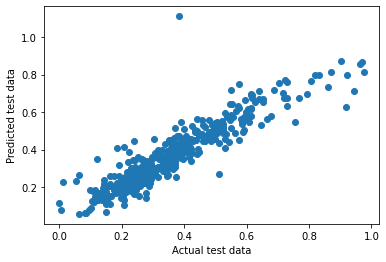

In [7610]:
# Plotting y_pred_test vs y_test

plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual test data')
plt.ylabel('Predicted test data')
plt.show()

In [7611]:
metric = []
print ("------ R2 values -------")
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train data = ", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test data = ", r2_test_lr)
metric.append(r2_test_lr)

print ("------ RSS values -------")
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train data = = ", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test data = ", rss2_lr)
metric.append(rss2_lr)

print ("------ MSE values -------")
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train data = ", mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test data = ", mse_test_lr)
metric.append(mse_test_lr**0.5)

------ R2 values -------
Train data =  0.8803998584649116
Test data =  0.8324854988199335
------ RSS values -------
Train data = =  3.6278662342394936
Test data =  2.2574368321803315
------ MSE values -------
Train data =  0.003602647700337134
Test data =  0.005225548222639657


## Ridge and Lasso Regression

From the metrics above, we can see significant different in the R2 value between train and test dataset. We will use regularisation technique to predict house prices using ridge and lasso regression

In [7612]:
X_train = X_train[cols]
X_test = X_test[cols]

In [7613]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Grid search cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [7614]:
# Printing the best hyperparameter alpha

optimal_ridge_lambda = model_cv.best_params_.get('alpha')
print(optimal_ridge_lambda)

0.5


In [7615]:
# Fitting Ridge model for alpha = 5 and printing coefficients which have been penalised
alpha = optimal_ridge_lambda
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.15972467  0.24769086  0.07770872  0.14532717  0.09696717  0.07324763
  0.06801808  0.05496961  0.05828973 -0.10385341  0.07444453  0.25601706
  0.0559938   0.04885989  0.0428158   0.58502513  0.07032304 -0.04725673
  0.03325034  0.09849858  0.0393001   0.09513602  0.10977274  0.04749525
  0.13500971  0.06023976  0.04626214  0.03407021  0.05498213  0.0325241
  0.0356474   0.04992437 -0.03494235 -0.04256879 -0.11567619 -0.09054443
  0.02792469 -0.03054552  0.02806899  0.0547178   0.02160958 -0.06114092
 -0.03024521  0.03419922  0.02160958  0.09216661 -0.0321899  -0.06429561
  0.02875655  0.07341282]


In [7616]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

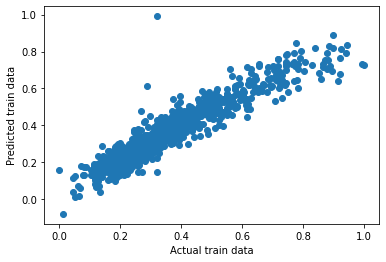

In [7617]:
# Plotting y_pred_train vs y_train for Ridge

plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual train data')
plt.ylabel('Predicted train data')
plt.show()

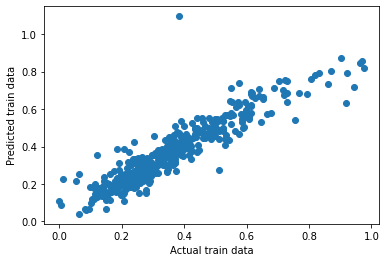

In [7618]:
# Plotting y_pred_test vs y_test for Ridge

plt.scatter(y_test, y_pred_test, )
plt.xlabel('Actual train data')
plt.ylabel('Predicted train data')
plt.show()

In [7619]:
metric2 = []

print ("------ R2 values -------")
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train data = ", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test data = ", r2_test_lr)
metric2.append(r2_test_lr)

print ("------ RSS values -------")
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train data = = ", rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test data = ", rss2_lr)
metric2.append(rss2_lr)

print ("------ MSE values -------")
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train data = ", mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test data = ", mse_test_lr)
metric2.append(mse_test_lr**0.5)

------ R2 values -------
Train data =  0.8779575155232987
Test data =  0.8420168958085905
------ RSS values -------
Train data = =  3.7019505402995407
Test data =  2.1289910769009213
------ MSE values -------
Train data =  0.00367621702115148
Test data =  0.004928220085418799


## Lasso

In [7620]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [7621]:
# Printing the best hyperparameter alpha
optimal_lasso_lambda = model_cv.best_params_.get('alpha')
print (optimal_lasso_lambda)

0.0001


In [7622]:
# Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = optimal_lasso_lambda

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [7623]:
lasso.coef_

array([-0.15861046,  0.24391636,  0.06403385,  0.13298388,  0.05985949,
        0.06357944,  0.06716321,  0.05676011,  0.03366733, -0.09471287,
        0.07758574,  0.2632041 ,  0.05162337,  0.04209778,  0.02986199,
        0.64470754,  0.0659154 , -0.04946074,  0.01759732,  0.08986631,
        0.03814909,  0.09029909,  0.10718552,  0.04532447,  0.12934988,
        0.05362272,  0.0107035 , -0.        ,  0.01582792,  0.        ,
        0.        ,  0.        , -0.03058375, -0.04504254, -0.103191  ,
       -0.08530954,  0.03121576, -0.01316016,  0.        ,  0.04906016,
        0.        , -0.        , -0.02515431,  0.00413275,  0.        ,
        0.03093782, -0.        , -0.06324368,  0.02205198,  0.04065239])

In [7624]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

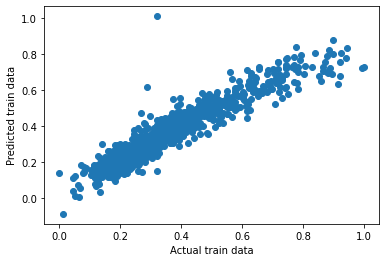

In [7625]:
# Plotting y_pred_train vs y_train for Ridge

plt.scatter(y_train, y_pred_train, )
plt.xlabel('Actual train data')
plt.ylabel('Predicted train data')
plt.show()

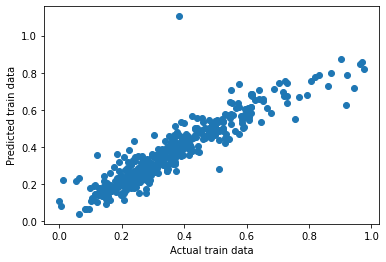

In [7626]:
# Plotting y_pred_test vs y_test for Ridge

plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual train data')
plt.ylabel('Predicted train data')
plt.show()

In [7627]:
metric3 = []
print ("------ R2 values -------")
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train data = ", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test data = ", r2_test_lr)
metric3.append(r2_test_lr)

print ("------ RSS values -------")
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train data = = ", rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test data = ", rss2_lr)
metric3.append(rss2_lr)

print ("------ MSE values -------")
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train data = ", mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test data = ", mse_test_lr)
metric3.append(mse_test_lr**0.5)

------ R2 values -------
Train data =  0.8760412899450529
Test data =  0.8435192483790404
------ RSS values -------
Train data = =  3.760075973792145
Test data =  2.108745271292675
------ MSE values -------
Train data =  0.003733938404957443
Test data =  0.00488135479465897


In [7628]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.880400          0.877958          0.876041
1   R2 Score (Test)           0.832485          0.842017          0.843519
2       RSS (Train)           3.627866          3.701951          3.760076
3        RSS (Test)           2.257437          2.128991          2.108745
4       MSE (Train)           0.060022          0.060632          0.061106
5        MSE (Test)           0.072288          0.070201          0.069867

## Comparing the coefficients

In [7629]:
# Creating Dataframe using columns of the dataset
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

# Assigning coefficients to each column (Linear, Ridge and Lasso)
betas['Linear'] = lr_model.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [7630]:
# Top predictors with high positive correlation as per Lasso regression

betas.sort_values(by='Lasso', ascending=False).head(20)

Linear     Ridge     Lasso
GrLivArea             0.713362  0.585025  0.644708
OverallQual           0.250221  0.256017  0.263204
LotArea               0.296597  0.247691  0.243916
GarageCars            0.150786  0.145327  0.132984
Neighborhood_StoneBr  0.141188  0.135010  0.129350
Neighborhood_NridgHt  0.117053  0.109773  0.107186
Neighborhood_NoRidge  0.092490  0.095136  0.090299
Neighborhood_Crawfor  0.097094  0.098499  0.089866
BsmtFullBath          0.077328  0.074445  0.077586
BsmtQual              0.080662  0.068018  0.067163
KitchenQual           0.066477  0.070323  0.065915
GarageAge             0.562445  0.077709  0.064034
MasVnrArea            0.069637  0.073248  0.063579
GarageQual            0.136137  0.096967  0.059859
BsmtExposure          0.059275  0.054970  0.056760
Neighborhood_Veenker  0.062217  0.060240  0.053623
ExterQual             0.051862  0.055994  0.051623
Exterior1st_BrkFace   0.049066  0.054718  0.049060
Neighborhood_Somerst  0.051941  0.047495  0.045324
WoodDeckSF            0.040329  0.048860  0.042098

In [7631]:
# Top predictors with high negative correlation as per Lasso regression

betas.sort_values(by='Lasso').head(20)

Linear     Ridge     Lasso
LotFrontage          -0.215492 -0.159725 -0.158610
BldgType_Twnhs       -0.125177 -0.115676 -0.103191
TotalBsmtSF          -0.221257 -0.103853 -0.094713
BldgType_TwnhsE      -0.094961 -0.090544 -0.085310
Exterior2nd_Stucco   -0.071683 -0.064296 -0.063244
HouseAge             -0.065622 -0.047257 -0.049461
BldgType_Duplex      -0.048584 -0.042569 -0.045043
BldgType_2fmCon      -0.040269 -0.034942 -0.030584
Exterior1st_Wd Sdng  -0.036761 -0.030245 -0.025154
HouseStyle_2.5Fin    -0.049692 -0.030546 -0.013160
GarageType_CarPort    0.057825  0.032524  0.000000
RoofStyle_Shed        0.033125  0.028069  0.000000
GarageType_Detchd     0.059670  0.035647  0.000000
GarageType_Basment    0.055385  0.034070 -0.000000
Exterior2nd_CBlock    0.032464  0.021610  0.000000
Exterior2nd_Stone    -0.043003 -0.032190 -0.000000
GarageType_No Garage -0.372514  0.049924  0.000000
Exterior1st_CemntBd  -0.104184 -0.061141 -0.000000
Exterior1st_CBlock    0.032464  0.021610  0.000000
Exterior2nd_Brk Cmn   0.041758  0.034199  0.004133

## Inference

From the final metrics report, we can infer the following - 
- The top 3 strong predictors in house price prediction are `GrLivArea`, `OverallQual` and `LotArea`. Quality becomes an important aspect while choosing a house.
- We see a slight negative correlation with `LotFrontage`, `BldgType_Twnhs`, `TotalBsmtSF`
- We also saw how lasso regression shrinked the coefficients of different features - `GarageType_CarPort`, `RoofStyle_Shed`, `GarageType_Detchd`, etc. 